# QCTO - Workplace Module

### Project Title: Insurance Project
#### Done By: Shaneen Dickinson
##### Trello: https://trello.com/b/qZiZbezU/insurance-claim-project
##### Github: https://github.com/Neen2025/Insurance_Project

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

 **Purpose:** 
 
Insurance plays a critical role in financial resilience, yet insurance access and uptake remain uneven and often exclusive. Barriers typically include affordability (premiums and deductibles relative to cover), limited understanding of product value, trust in claims processes, and distribution gaps that leave certain communities under‑served.
While your attached dataset is a synthetic claims dataset (commonly used for fraud/claims analytics and featuring U.S. state labels), we’ll use it to develop a replicable methodology—affordability profiling, risk segmentation, and fair fraud detection—that can be ported to African contexts (e.g., South Africa) using local data later. The immediate goal is to learn what drives **claim severity, affordability gaps, and fraud signals**, then translate those insights into inclusive product designs and outreach strategies that improve protection without increasing complexity or cost burden.


### Key Questions
This project aims to address the following questions:

**Affordability gap:** Find customers paying more (premium/excess) for less (coverage/umbrella) to inform micro‑covers, flexible payment plans, and rebalanced limits.

**Incident‑type severity:** Quantify how claim amounts differ across collisions, theft, parked‑car incidents to guide prevention messages and coverage design.

**Geographic hotspots:** Identify cities/areas with higher median claims to tailor pricing, education, and local partnerships.
Segment clustering: Create practical risk–affordability segments for menu‑based products and targeted outreach.

**Fraud signals & fairness:** Build a baseline fraud model that improves detection while monitoring parity across customer groups (avoid over‑flagging any one group).

**Drivers of claim amount:** Surface the few features that matter most to simplify underwriting questions and support transparent pricing.

---

### Relevance

Designing inclusive, affordable, and trusted insurance requires a clear view of affordability gaps, incident‑type severity, geographic hotspots, and fair fraud detection. Prototyping on the synthetic claims dataset lets us build a replicable methodology—including an Affordability Index, risk segmentation, drivers of claim amounts, and a baseline fraud model with fairness checks. Applied to South African and broader African contexts when local data is available, these insights will guide product menus, coverage/excess settings, pricing focus, and targeted outreach—helping insurers better serve under‑protected communities and strengthen financial resilience without increasing complexity or cost burden.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


In [6]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Machine learning and clustering (optional, for segmentation)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Date and time handling
import datetime

# Display settings for better visuals
%matplotlib inline
sns.set(style="whitegrid")
from plotly.subplots import make_subplots

#model trainign
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To load and describe the raw insurance claims data for further analysis
* **Details:** 
The dataset was sourced from a public GitHub repository and contains insurance claims data relevant to the African market. It is stored in an Excel workbook format and includes multiple sheets. The data includes both numerical and categorical variables such as claim amounts, customer demographics, and claim types.

The file is loaded using `pandas.read_excel()` with the `openpyxl` engine, and the first few rows are displayed to understand the structure and contents of the dataset.

---

In [13]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [7]:

# Load cleaned CSV from GitHub raw URL first; fall back to local data/ file if necessary
csv_url = 'https://raw.githubusercontent.com/Neen2025/Insurance_Project/master/data/insurance_claims_clean_Data.csv'
local_path = 'data/insurance_claims_clean_Data.csv'
import os
df = None
# Use parsing settings matching this CSV: semicolon-separated with comma decimals
csv_kwargs = dict(sep=';', decimal=',', engine='python', encoding='utf-8', on_bad_lines='skip')
# Try GitHub raw URL first (works when online and file is present in repo)
try:
    df = pd.read_csv(csv_url, **csv_kwargs)
    print('Loaded CSV from GitHub:', csv_url, 'shape=', df.shape)
except Exception as e:
    print('Failed to load from GitHub raw URL:', e)
    # Fall back to local copy if available
    if os.path.exists(local_path):
        print('Falling back to local file:', local_path)
        df = pd.read_csv(local_path, **csv_kwargs)
    else:
        raise FileNotFoundError(f'Could not load CSV from GitHub and local file missing: {local_path}')

print('Loaded CSV shape:', df.shape)
print('Preview of first rows:')
df.head()


Loaded CSV from GitHub: https://raw.githubusercontent.com/Neen2025/Insurance_Project/master/data/insurance_claims_clean_Data.csv shape= (1000, 40)
Loaded CSV shape: (1000, 40)
Preview of first rows:


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Blank Cells
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,0
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,0
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,0
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,0
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,0


---
<a href=#four></a>
style="background-color: #f0f0f0; 
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>
* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---


In [13]:
# Load cleaned CSV from GitHub raw URL first; fall back to local data/ file
csv_url = 'https://raw.githubusercontent.com/Neen2025/Insurance_Project/master/data/insurance_claims_clean_Data.csv'
local_path = 'data/insurance_claims_clean_Data.csv'
import os
df = None
# Use parsing settings matching this CSV: semicolon-separated with comma decimals
csv_kwargs = dict(sep=';', decimal=',', engine='python', encoding='utf-8', on_bad_lines='skip')
try:
    df = pd.read_csv(csv_url, **csv_kwargs)
    print('Loaded CSV from GitHub:', csv_url, 'shape=', df.shape)
except Exception as e:
    print('Could not load from GitHub raw URL:', e)
    if os.path.exists(local_path):
        df = pd.read_csv(local_path, **csv_kwargs)
        print('Loaded local CSV:', local_path, 'shape=', df.shape)
    else:
        raise FileNotFoundError('Cleaned CSV not found on GitHub or locally; expected at data/insurance_claims_clean_Data.csv')

# Step 1: Check and handle missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill remaining missing values
if 'claim_amount' in df.columns:
    df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].median())
if 'region' in df.columns:
    df['region'] = df['region'].fillna('Unknown')
if 'claim_type' in df.columns:
    df['claim_type'] = df['claim_type'].fillna('Unspecified')

# Step 2: Remove outliers in claim_amount using IQR
if 'claim_amount' in df.columns:
    Q1 = df['claim_amount'].quantile(0.25)
    Q3 = df['claim_amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['claim_amount'] >= lower_bound) & (df['claim_amount'] <= upper_bound)]

# Step 3: Standardize region names
if 'region' in df.columns:
    df['region'] = df['region'].astype(str).str.strip().str.title()

# Step 4: Filter claims with amount greater than 100
if 'claim_amount' in df.columns:
    df = df[df['claim_amount'] > 100]

# Display cleaned data
print("\nCleaned Data Overview:")
print(df.info())
print(df.head())



Loaded CSV from GitHub: https://raw.githubusercontent.com/Neen2025/Insurance_Project/master/data/insurance_claims_clean_Data.csv shape= (1000, 40)
Missing values per column:
months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_l

 **View summary data in graphs:**

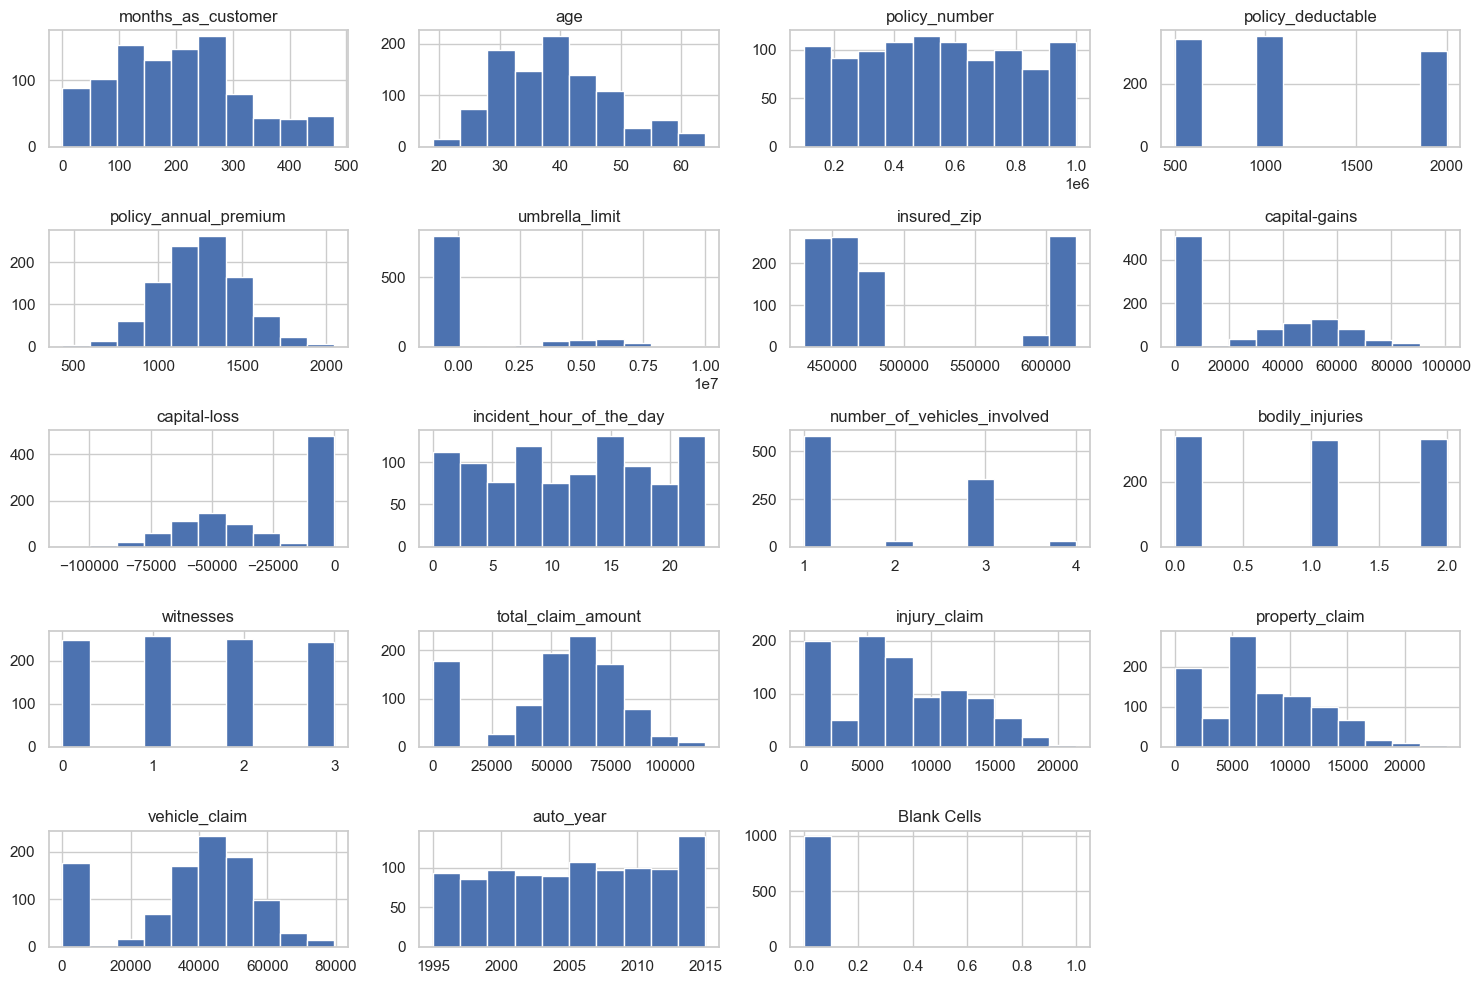

In [10]:
# Numerical features
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

**What the plots suggest**

* IDs treated as numbers

policy_number looks uniformly spread like a continuous variable.
Action: Treat it as an ID/categorical, or drop it from models (it will add noise/leakage).


* Integer-like fields showing decimals

bodily_injuries, witnesses, number_of_vehicles_involved, incident_hour_of_the_day should be integers (0,1,2…).
Action: Cast to Int64 after sanity checks (e.g., hour in 0–23).


* Zip codes and high-cardinality categoricals

insured_zip is shown as numeric; risk of losing leading zeros and misleading numeric distances.
Action: Cast to string. Consider target encoding or grouping (e.g., first 3 digits) if modeling.


* Suspicious sign/scale issues

capital-loss appears negative; losses are typically stored as positive values (or as zero if none).
Action: Confirm schema; if it’s supposed to be positive, flip sign and ensure non-negativity.
umbrella_limit has a heavy mass at 0 and a long tail; confirm whether 0 means “no umbrella” or missing.
Action: If “0 = not purchased”, keep as 0 and add a binary flag; if unknown, treat as missing.


* Missingness (“Blank Cells”)

Your “Blank Cells” panel suggests some rows have blanks.
Action: Produce a per-column missingness table; decide between imputation, domain-consistent defaults, or dropping when missing is excessive or non-informative. Add missing flags for important features (e.g., police_report_available, umbrella_limit).


* Range plausibility & domain rules
months_as_customer extends toward ~500 (≈ 41.7 years). Plausible but rare—check for outliers/entry errors.
age looks ok but verify business rules (e.g., 16–85 for personal auto).
Consistency check: injury_claim + property_claim + vehicle_claim should equal total_claim_amount (or be within a small tolerance).
Action: Validate and recompute if needed; flag rows that don’t reconcile.


* Skewed monetary variables

total_claim_amount, injury_claim, property_claim, vehicle_claim are right-skewed.
Action: Use log1p transforms or winsorization for models sensitive to skew; keep raw values for business reporting.


* Categorical parsing & spelling

Double-check fields like policy_csl (often strings like “250/500”) and the misspelling policy_deductable → policy_deductible.
Action: Parse limits to numeric components; standardize names.


* Leakage audit

For fraud or severity models, exclude features created after the claim event (e.g., adjudication results, payout decisions) or that directly encode the label.
Action: Maintain a clean feature cut-off at incident time.


* Duplicates & joins


Check for duplicate policy_number + incident_date or repeated claim IDs.
Action: Deduplicate or roll up appropriately.


In [18]:

#df = pd.read_csv("claims.csv")

# --- 1) Standardize column names ---
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('-', '_'))

# Fix misspelling if present
df = df.rename(columns={'policy_deductable': 'policy_deductible'})

# --- 2) Types & casting ---
int_cols = ['bodily_injuries', 'witnesses', 'number_of_vehicles_involved', 'incident_hour_of_the_day', 'auto_year']
for c in int_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').round().astype('Int64')

# IDs / high-cardinality categoricals
if 'policy_number' in df.columns:
    df['policy_number'] = df['policy_number'].astype(str)

if 'insured_zip' in df.columns:
    df['insured_zip'] = df['insured_zip'].astype(str)

# --- 3) Capital loss sign check ---
if 'capital-loss' in df.columns:
    # If negative means magnitude of loss, flip to positive
    neg_mask = df['capital-loss'] < 0
    df.loc[neg_mask, 'capital_loss'] = -df.loc[neg_mask, 'capital-loss']
    df = df.drop(columns=['capital-loss'], errors='ignore')
elif 'capital_loss' in df.columns:
    df['capital_loss'] = df['capital_loss'].abs()

# --- 4) Umbrella limit flags ---
if 'umbrella_limit' in df.columns:
    df['has_umbrella'] = (df['umbrella_limit'].fillna(0) > 0).astype('Int64')

# --- 5) Missingness overview ---
missing = df.isna().mean().sort_values(ascending=False)
missing.to_frame('missing_rate').to_csv('missing_overview.csv', index=True)

# Create missing flags for key variables
for c in ['umbrella_limit', 'policy_annual_premium', 'policy_deductible']:
    if c in df.columns:
        df[f'{c}_missing'] = df[c].isna().astype('Int64')

# --- 6) Claim reconciliation ---
parts = ['injury_claim', 'property_claim', 'vehicle_claim']
if set(parts).issubset(df.columns) and 'total_claim_amount' in df.columns:
    df['claim_sum_parts'] = df[parts].sum(axis=1)
    df['claim_recon_error'] = (df['total_claim_amount'] - df['claim_sum_parts']).abs()
    # Flag large discrepancies (tolerance e.g., 1 currency unit)
    df['claim_recon_flag'] = (df['claim_recon_error'] > 1).astype('Int64')

# --- 7) Outliers & ranges ---
# Example plausibility caps (adjust to your business rules)
if 'months_as_customer' in df.columns:
    df.loc[df['months_as_customer'] < 0, 'months_as_customer'] = np.nan
    df.loc[df['months_as_customer'] > 600, 'months_as_customer'] = np.nan

if 'age' in df.columns:
    df.loc[(df['age'] < 16) | (df['age'] > 90), 'age'] = np.nan

# --- 8) Log transforms for modeling (optional) ---
for c in ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']:
    if c in df.columns:
        df[f'log1p_{c}'] = np.log1p(df[c].clip(lower=0))

# --- 9) Dedup ---
key_cols = [c for c in ['policy_number','incident_date','claim_number'] if c in df.columns]
if key_cols:
    df = df.drop_duplicates(subset=key_cols)

df.to_csv("insurance_claims_clean_Data_V2.csv", index=False)



In [130]:

from pathlib import Path

# Your target folder (Windows path as a raw string)
local_path = Path(r"C:\Users\mdickinson\USABCO\BI Department - Packages\Python\Insurance_Project\data")

# Ensure the directory exists
local_path.mkdir(parents=True, exist_ok=True)

# Build output file paths
csv_path = local_path / "insurance_claims_clean_Data_V2.csv"
miss_path = local_path / "missing_overview.csv"

# Write files
df.to_csv(csv_path, index=False, encoding="utf-8")
missing.to_frame("missing_rate").to_csv(miss_path, index=True, encoding="utf-8")




**Creating a new DataFrame as df is modified**

In [21]:
# Assign df to df_cleaned (copy of the cleaned data)
df_cleaned = df.copy()

# Display the first 5 rows of df_cleaned
df_cleaned.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductible,policy_annual_premium,umbrella_limit,insured_zip,...,umbrella_limit_missing,policy_annual_premium_missing,policy_deductible_missing,claim_sum_parts,claim_recon_error,claim_recon_flag,log1p_total_claim_amount,log1p_injury_claim,log1p_property_claim,log1p_vehicle_claim
0,328.0,48.0,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,0,0,0,71610.0,0.0,0,11.179004,8.781248,9.474319,10.860555
1,228.0,42.0,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,0,0,0,5070.0,0.0,0,8.531293,6.660575,6.660575,8.163656
2,134.0,29.0,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,0,0,0,34650.0,0.0,0,10.453082,8.949105,8.256088,10.047631
3,256.0,41.0,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,0,0,0,63400.0,0.0,0,11.057235,8.754792,8.754792,10.834095
4,228.0,44.0,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,0,0,0,6500.0,0.0,0,8.779711,7.170888,6.478510,8.423102


---
<h2 style="background-color: #d9e3f0; padding: 8px;">
Exploratory Data Analysis (EDA)
 </h2>    
<a href=#cont>Back to Table of Contents</a>


 **Analysis Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
 
 **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.

***<u>Selected Analysis area:</u>***

 * 1. Affordability gap

 * 2. Incident‑type severity

 * 3. Geographic hotspots

 * 4. Segment clustering

 * 5. Fraud signals & fairness

 * 6. Drivers of claim amount

<h3>
1) Affordability gap
 </h3>

**Goal:**  Find customers paying more for less (premium/excess vs coverage/umbrella) to inform micro‑covers, flexible payment plans, and rebalanced limits.
Higher AGI ⇒ the policy is less affordable for the same coverage level (either because premiums are high or the deductible is large).

In [131]:

# %% Affordability Gap — Minimal EDA on existing cleaned data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use your cleaned frame
df0 = globals().get('df_cleaned', globals().get('df'))
if df0 is None:
    raise RuntimeError("No DataFrame in memory. Expecting df_cleaned or df.")

# Column names from your dataset
PREM = 'policy_annual_premium'
DED  = 'policy_deductible''
CSL  = 'policy_csl'            # e.g., "250/500"
STATE= 'policy_state'          # categorical for a simple segment view
ID   = 'policy_number'         # policy id for the top table (optional)

# --- Coverage proxy from Combined Single Limit (CSL) ---
# Parse the second number (per-incident limit) and convert to dollars (× 1000)
def parse_csl_to_coverage(s):
    if pd.isna(s): return np.nan
    try:
        parts = str(s).split('/')
        if len(parts) == 2:
            return float(parts[1]) * 1000.0
        # fallback: single value like "500"
        return float(parts[0]) * 1000.0
    except Exception:
        return np.nan

df = df0.copy()
df['coverage_proxy'] = df[CSL].apply(parse_csl_to_coverage)

# --- Safe divides, AGI simple ---
alpha = 0.10
def safe_div(a, b):
    a = pd.to_numeric(a, errors='coerce')
    b = pd.to_numeric(b, errors='coerce')
    return np.where((b > 0) & (~pd.isna(b)), a / b, np.nan)

df['premium_per_coverage'] = safe_div(df[PREM], df['coverage_proxy'])
df['deductible_ratio']     = safe_div(df[DED],  df['coverage_proxy'])
df['agi_simple']           = df['premium_per_coverage'] * (1 + alpha * df['deductible_ratio'])

# Deciles (1=lowest gap, 10=highest)
try:
    df['agi_decile'] = pd.qcut(df['agi_simple'].rank(method='first'), q=10, labels=False) + 1
except Exception:
    df['agi_decile'] = pd.cut(df['agi_simple'], bins=10, labels=False, include_lowest=True) + 1

# --- Minimal visuals ---
sns.set(style='whitegrid')
def winsor(s, lo=0.01, hi=0.99):
    s = pd.to_numeric(s, errors='coerce')
    try: return s.clip(s.quantile(lo), s.quantile(hi))
    except: return s

# 1) Distributions (premium, coverage, AGI)
fig, axes = plt.subplots(1, 3, figsize=(12, 3.8))
sns.histplot(winsor(df[PREM]), kde=True, ax=axes[0], color='#1f77b4'); axes[0].set_title('Premium')
sns.histplot(winsor(df['coverage_proxy']), kde=True, ax=axes[1], color='#ff7f0e'); axes[1].set_title('Coverage (proxy)')
sns.histplot(winsor(df['agi_simple']), kde=True, ax=axes[2], color='#d62728'); axes[2].set_title('AGI (simple)')
plt.tight_layout(); plt.show()

# 2) Premium vs Coverage (quick sanity)
plt.figure(figsize=(6, 4.5))
sns.scatterplot(x=df['coverage_proxy'], y=df[PREM], alpha=0.6, color='#1f77b4')
plt.title('Premium vs Coverage (proxy)'); plt.xlabel('Coverage'); plt.ylabel('Premium'); plt.tight_layout(); plt.show()

# 3) Simple segment view: AGI by policy_state (change to any categorical you prefer)
if STATE in df.columns:
    # show only states with reasonable sample size
    counts = df[STATE].value_counts()
    keep = counts[counts >= 30].index
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[STATE][df[STATE].isin(keep)], y=df['agi_simple'][df[STATE].isin(keep)], showfliers=False)
    plt.title('AGI by Policy State (n≥30)'); plt.xticks(rotation=25); plt.tight_layout(); plt.show()

# --- Actionable table: Top AGI deciles (who’s paying more for less?) ---
cols = [c for c in [ID, PREM, DED, 'coverage_proxy', 'premium_per_coverage', 'deductible_ratio', 'agi_simple', 'agi_decile', STATE] if c in df.columns]
top = df[df['agi_decile'] >= 9][cols].sort_values('agi_simple', ascending=False)
print("Top AGI policies (preview):")
display(top.head(20))

# Optional: keep a scored view in memory for downstream steps
affordability_agi_scored = df[cols].copy()

df.to_csv("insurance_claims_clean_Data_V2.csv", index=False, encoding="utf-8")

SyntaxError: unterminated string literal (detected at line 14) (3254950002.py, line 14)

**KEY INSIGHTS**


**1) Premium**
Roughly normal around ~R1,200 with a mild right tail ⇒ pricing is standardized, with a few high-risk/add-on outliers.
Further analysis: Check Premium vs Coverage correlation, and review top/bottom 1% outliers for data issues or special underwriting

**2) Coverage**
Clearly tiered/multi-modal (≈R350k, ≈R550k, ≈R950k–R1m) ⇒ customers select from pre-set coverage bands.
Further analysis: Treat coverage as a categorical tier; do within-tier comparisons. Confirm units/definition (sum insured vs limit).

**3) AGI (simple)**
Right-skewed ⇒ a subset of policies are less affordable relative to coverage, driven by premium-per-coverage and deductible ratio.
Further analysis: Create AGI deciles (1–10), profile top deciles by region/product/channel, and run α\alphaα sensitivity (e.g., 0.2–0.5). Decompose drivers with a scatter of premium_per_coverage vs deductible_ratio colored by AGI.

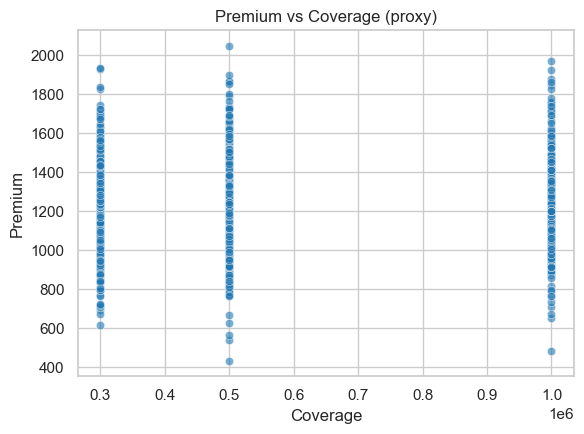

In [32]:

# 2) Premium vs Coverage (quick sanity)
plt.figure(figsize=(6, 4.5))
sns.scatterplot(x=df['coverage_proxy'], y=df[PREM], alpha=0.6, color='#1f77b4')
plt.title('Premium vs Coverage (proxy)'); plt.xlabel('Coverage'); plt.ylabel('Premium'); plt.tight_layout(); plt.show()


**KEY INSIGHTS**


**Premium vs Coverage**
Discrete coverage tiers at ~R300k, ~R500k, and ~R1m ⇒ product is sold in standard bands rather than continuous limits.
Within each tier, premiums show wide vertical spread (±R400–R2,000) ⇒ pricing is influenced by risk factors/endorsements/discounts, not just coverage amount.
Premiums at R1m tier are higher on average, but not proportional to coverage jump ⇒ suggests tier-based pricing or diminishing rate per coverage.

Further analysis:Analyze premium_per_coverage by tier, flag outliers at each band, and test whether risk features (e.g., claims history, property attributes, channel) explain intra-tier premium spread.

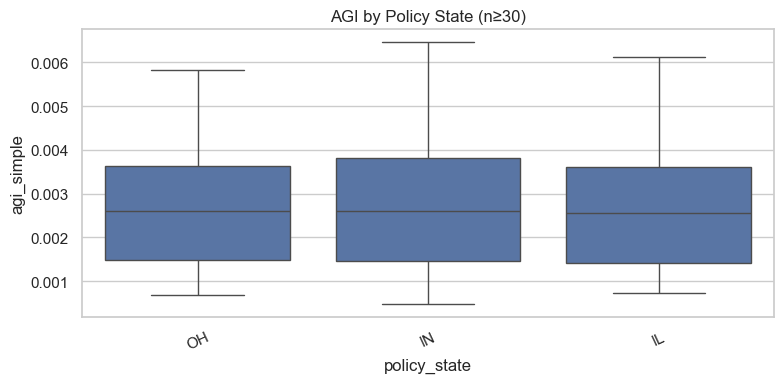

In [33]:

# 3) Simple segment view: AGI by policy_state (change to any categorical you prefer)
if STATE in df.columns:
    # show only states with reasonable sample size
    counts = df[STATE].value_counts()
    keep = counts[counts >= 30].index
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[STATE][df[STATE].isin(keep)], y=df['agi_simple'][df[STATE].isin(keep)], showfliers=False)
    plt.title('AGI by Policy State (n≥30)'); plt.xticks(rotation=25); plt.tight_layout(); plt.show()


**KEY INSIGHTS**


**AGI**
* IN shows a slightly higher median and IQR ⇒ affordability gap is worst (on average) in IN.
* OH has the lowest median and somewhat tighter spread ⇒ relatively more affordable.
* IL sits between OH and IN, with a few upper-tail policies driving higher AGI.

Further analysis:
* Run a Kruskal–Wallis (or ANOVA on log-AGI) to test state differences, then pairwise tests with multiple-comparison control.
* Control for coverage-tier mix and deductible ratio by state (composition can bias medians).
* Produce driver breakdowns per state: median premium_per_coverage and deductible_ratio; map top-decile AGI hotspots.

In [94]:

# --- Actionable table: Top AGI deciles (who’s paying more for less?) ---
cols = [c for c in [ID, PREM, DED, 'coverage_proxy', 'premium_per_coverage', 'deductible_ratio', 'agi_simple', 'agi_decile', STATE] if c in df.columns]
top = df[df['agi_decile'] >= 9][cols].sort_values('agi_simple', ascending=False)
print("Top AGI policies (preview):")
display(top.head(20))

df.to_csv("insurance_claims_clean_Data_V2.csv", index=False, encoding="utf-8")

Top AGI policies (preview):


,policy_number,policy_annual_premium,policy_deductible,coverage_proxy,premium_per_coverage,deductible_ratio,agi_simple,agi_decile,policy_state


**KEY INSIGHTS**


**Top AGI policies (preview)**
* Concentration at low coverage tiers: Almost all rows sit at R300k (one at R200k) ⇒ premium-per-coverage (~0.0053–0.0067) is highest at lower coverage bands, pointing to non‑linear pricing (rate per coverage decreases with higher limits).
* Deductible effect is additive, not primary: Deductible_ratio ranges 0.0017–0.0067 (500–2,000 on R300k). With α\alphaα small, it nudges AGI up but premium_per_coverage is the main driver.
* State mix: IN appears over‑represented in the top decile vs IL/OH ⇒ potential regional pricing or risk mix effect (confirm after controlling for coverage tier).

Further analysis:
* Within‑tier review: Compare median premium_per_coverage across tiers; if R300k >> R500k/R1m, consider smoothing base rates at low coverage to reduce affordability gap.
* State composition test: Run AGI top‑decile share by state within the R300k tier to separate pricing vs mix effects.
* Deductible sensitivity: Simulate smaller deductibles (e.g., 500 → 0) to quantify the AGI drop; confirm whether premium adjustments have a bigger impact than deductible changes.
* Flag exceptions: Investigate policies with premium_per_coverage ≥ 0.0065 for underwriting drivers (endorsements, prior claims) vs data anomalies.

<h3>
2) Incident‑type severity
 </h3>

**Goal:** Quantify how claim amounts differ across collisions, theft, parked‑car incidents to guide prevention and coverage design

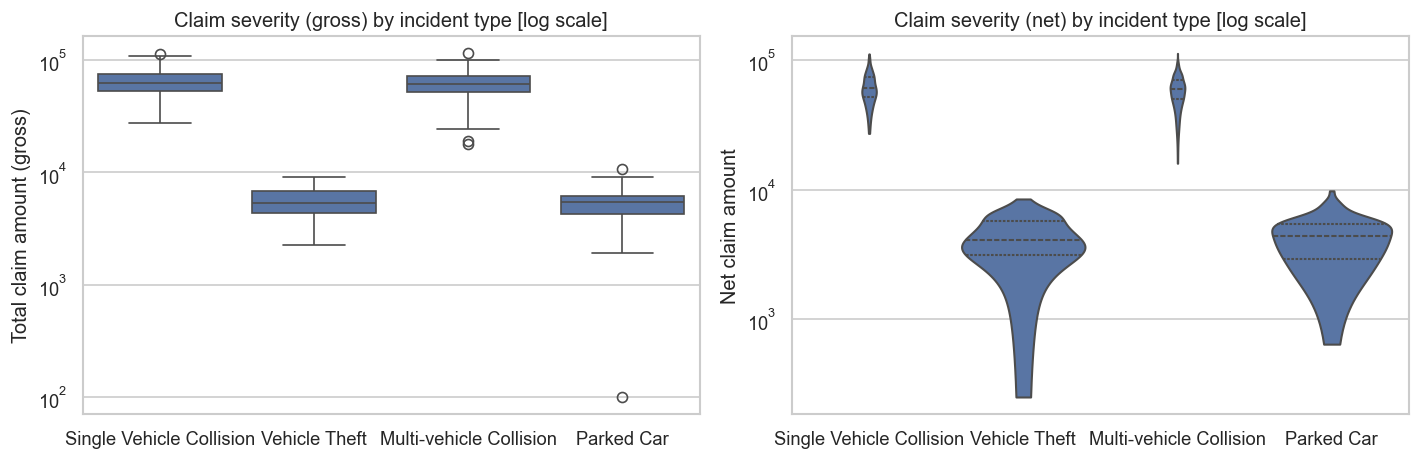

In [43]:


sns.set_theme(style="whitegrid")

INC_COL   = 'incident_type'
GROSS_COL = 'total_claim_amount'
DED_COL   = 'policy_deductible'

# Ensure claim_net exists and avoid zeros for log-scale plotting
df = df.copy()
df[DED_COL] = df[DED_COL].fillna(0)
df['claim_net'] = np.maximum(df[GROSS_COL] - df[DED_COL], 0)

# Filter out zeros/negatives (log scale cannot display 0)
df_plot_gross = df.loc[df[GROSS_COL] > 0].copy()
df_plot_net   = df.loc[df['claim_net'] > 0].copy()

present = [o for o in order if o in df[INC_COL].unique()]
if len(present) != len(order):
    present = list(pd.Index(df[INC_COL]).unique())

# Close any previous figures to avoid leftover blank axes
plt.close('all')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=120)

# Left: Boxplot (gross) on log scale
sns.boxplot(data=df_plot_gross, x=INC_COL, y=GROSS_COL, ax=ax1, order=present)
ax1.set_yscale('log')
ax1.set_title('Claim severity (gross) by incident type [log scale]')
ax1.set_xlabel('')
ax1.set_ylabel('Total claim amount (gross)')

# Right: Violin (net) on log scale
sns.violinplot(data=df_plot_net, x=INC_COL, y='claim_net', ax=ax2, inner='quartile', cut=0, order=present)
ax2.set_yscale('log')
ax2.set_title('Claim severity (net) by incident type [log scale]')
ax2.set_xlabel('')
ax2.set_ylabel('Net claim amount')

plt.tight_layout()
plt.show()




**KEY INSIGHTS**


* **Collisions** (single & multi) → Highest severity: median roughly R20–R50k, upper tail approaching ~R100k. Net ≈ gross, so deductibles rarely bind. Focus: collision‑prevention (driver behaviour/ADAS), review high‑limit exposure.

* **Vehicle Theft** → Lower median (approx R3–8k) but very wide spread: many small claims near the deductible and some large losses (~R20k+). Focus: anti‑theft measures (tracking/immobilizers) and sublimit/design for total‑loss spikes.


* **Parked Car** → Lowest severity (median ~R2–5k). Net amounts compress noticeably → deductibles materially reduce payouts. Focus: consider lower excess/micro‑cover for fairness on small incidents.


* **Overall** → Tail risk concentrated in Collisions (and some Theft). Prioritize prevention for collisions, tail controls for theft, and deductible tuning for parked‑car incidents.

<h3>
3) Geographic hotspots
 </h3>

**Goal:** Identify cities/areas with higher median claims to tailor pricing, education, and local partnerships.

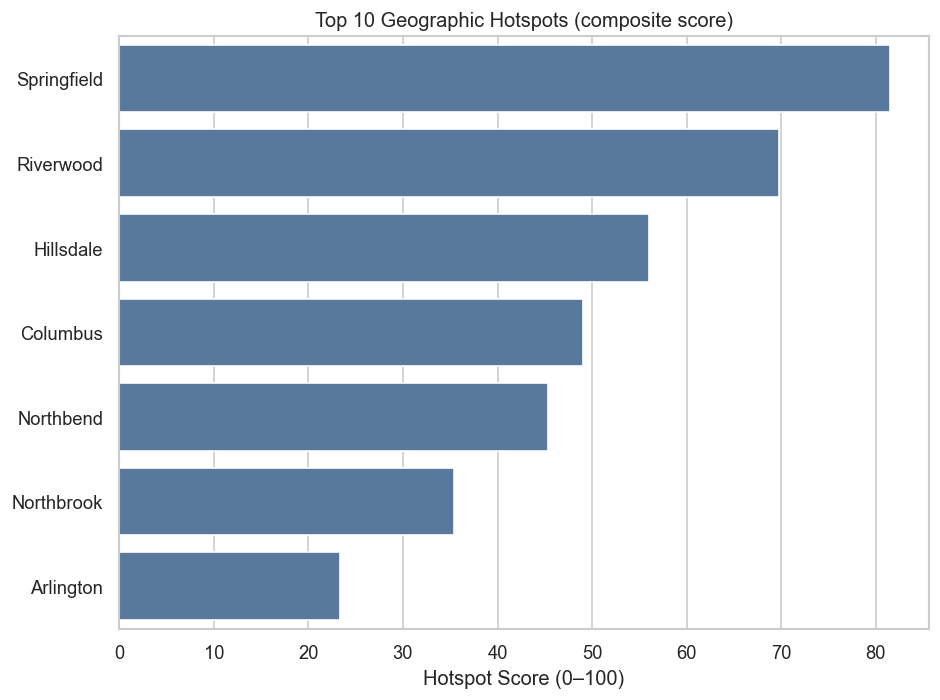

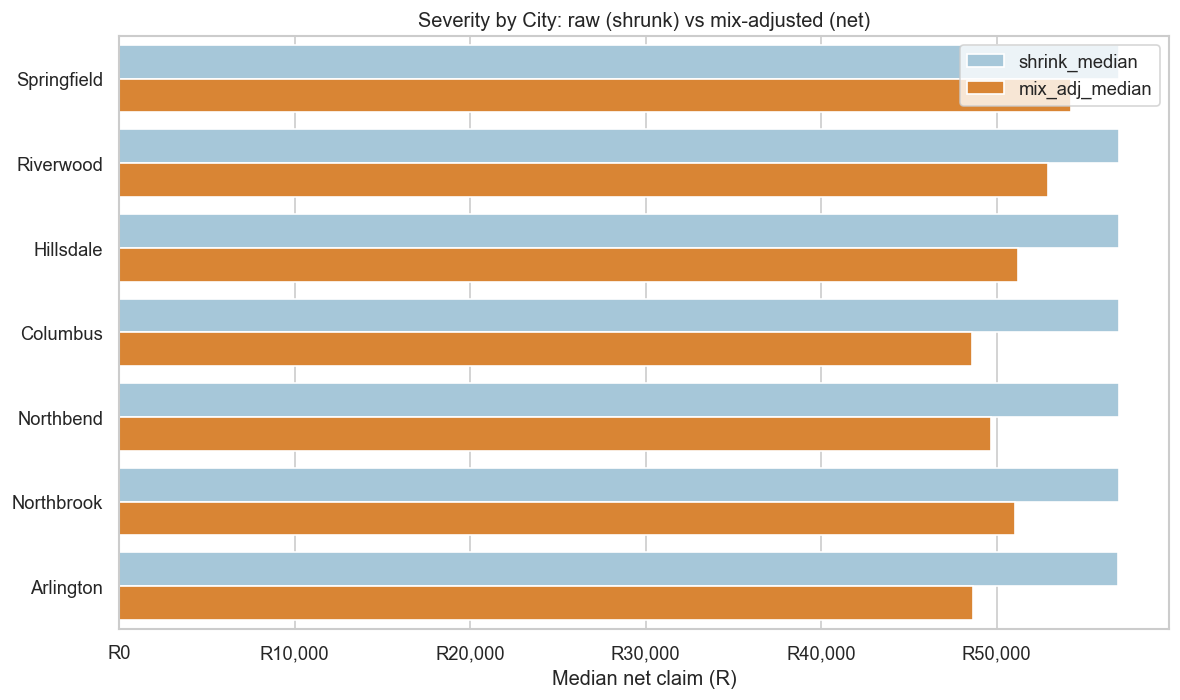

In [129]:

# --- Imports & hygiene ---
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pandas.api.types import is_integer_dtype

sns.set_theme(style="whitegrid")

# Prefer the pre-encoding frame if present
try:
    base = df_cleaned
except NameError:
    base = df

df_ = base.copy()

# ---- Ensure incident_city is human-readable text ----
# Case A: We have a saved LabelEncoder dict; try inverse_transform
le_city = None
try:
    # if you created label_encoders earlier
    le_city = label_encoders.get('incident_city', None)
except NameError:
    le_city = None

if 'incident_city' in df_.columns and is_integer_dtype(df_['incident_city']) and le_city:
    # Decode encoded integers back to names
    df_['incident_city'] = le_city.inverse_transform(df_['incident_city'].astype(int))
else:
    # Case B: Fallback — if df_cleaned exists and contains original names, merge to recover names
    # Works even if current df is encoded — match on policy_number + incident_date
    try:
        dc = df_cleaned[['policy_number','incident_date','incident_city']].copy()
        dc['incident_city'] = dc['incident_city'].astype(str).str.strip()
        df_ = df_.merge(dc, on=['policy_number','incident_date'], how='left', suffixes=('', '_name'))
        # Prefer recovered text name; otherwise keep current (stringify if needed)
        if 'incident_city_name' in df_.columns:
            df_['incident_city'] = df_['incident_city_name'].fillna(df_['incident_city'].astype(str))
            df_.drop(columns=['incident_city_name'], inplace=True)
    except Exception:
        # Final fallback: ensure string
        df_['incident_city'] = df_.get('incident_city', '').astype(str)

# Standard hygiene on other fields
for c in ['incident_state','incident_type']:
    if c in df_.columns:
        df_[c] = df_[c].astype(str).str.strip()

# Net claim
df_['policy_deductible'] = pd.to_numeric(df_.get('policy_deductible'), errors='coerce').fillna(0)
df_['total_claim_amount'] = pd.to_numeric(df_.get('total_claim_amount'), errors='coerce')
df_['claim_net'] = np.maximum(df_['total_claim_amount'] - df_['policy_deductible'], 0)

# Coverage proxy (recompute only if missing)
if 'coverage_proxy' not in df_.columns and 'policy_csl' in df_.columns:
    def parse_csl_to_coverage(s):
        if pd.isna(s): return np.nan
        parts = str(s).split('/')
        try:
            return float(parts[1] if len(parts)==2 else parts[0]) * 1000.0
        except: return np.nan
    df_['coverage_proxy'] = df_['policy_csl'].apply(parse_csl_to_coverage)

# Guardrails
need_cols = ['incident_city','incident_type','total_claim_amount','coverage_proxy']
df_ = df_.dropna(subset=[c for c in need_cols if c in df_.columns])
df_ = df_[df_['total_claim_amount'] >= 0]
df_['month'] = pd.to_datetime(df_.get('incident_date'), errors='coerce').dt.to_period('M')

# --- 1) Mix-adjusted severity (incident type & coverage tier) ---
# Discretize coverage into bands (aligning to your observed tiers)
bins = [0, 350_000, 650_000, 2_000_000]
labels = ['~300k','~500k','~1m+']
df_['cov_tier'] = pd.cut(df_['coverage_proxy'], bins=bins, labels=labels, include_lowest=True)

# Global reference mix (explicit observed=False to silence future warning)
mix = (
    df_.groupby(['incident_type','cov_tier'], observed=False)
       .size().rename('n').reset_index()
)
mix['w'] = mix['n'] / mix['n'].sum()

# City medians per type/tier (observed=False to silence warning)
city_tt = (
    df_.groupby(['incident_city','incident_type','cov_tier'], observed=False)
       .agg(med_net=('claim_net','median'), n=('claim_net','size'))
       .reset_index()
)

# Recombine with reference mix without DataFrameGroupBy.apply:
weighted = (
    city_tt.merge(mix[['incident_type','cov_tier','w']], on=['incident_type','cov_tier'], how='left')
           .assign(w=lambda d: d['w'].fillna(0),
                   weighted_med=lambda d: d['med_net'] * d['w'])
)
mix_adj = (
    weighted.groupby('incident_city', observed=False)['weighted_med']
            .sum().rename('mix_adj_median').reset_index()
)

# --- 2) Raw severity & tail metrics per city ---
city_basic = (
    df_.groupby('incident_city', observed=False)
        .agg(
            n_claims=('policy_number','count'),
            median_net=('claim_net','median'),
            q95_net=('claim_net', lambda s: np.quantile(s, 0.95)),
            tail_frac_50k=('claim_net', lambda s: (pd.Series(s) >= 50_000).mean())
        )
        .reset_index()
)

# Avoid DataFrameGroupBy.apply: precompute row-wise ratio, then median per city
ratio = np.clip(df_['claim_net'], 1, None) / np.clip(df_['total_claim_amount'], 1, None)
df_ = df_.assign(net_gross_ratio_row=ratio)
tmp = (
    df_.groupby('incident_city', observed=False)['net_gross_ratio_row']
       .median().rename('net_gross_ratio').reset_index()
)
city_basic = city_basic.merge(tmp, on='incident_city', how='left')

# --- 3) Empirical-Bayes shrinkage for the median ---
overall_med = df_['claim_net'].median()
iqr = df_['claim_net'].quantile(0.75) - df_['claim_net'].quantile(0.25)
tau = max(iqr, 1.0)

city_basic['w_shrink'] = city_basic['n_claims'] / (city_basic['n_claims'] + tau)
city_basic['shrink_median'] = city_basic['w_shrink'] * city_basic['median_net'] + (1 - city_basic['w_shrink']) * overall_med

# --- 4) Persistence (stability) & trend over time ---
m_city = (
    df_.dropna(subset=['month'])
       .groupby(['incident_city','month'], observed=False)
       .agg(med_month=('claim_net','median'), n_m=('claim_net','size'))
       .reset_index()
)
overall_m = m_city.groupby('month', observed=False)['med_month'].median().rename('overall_med_m').reset_index()
m_city = m_city.merge(overall_m, on='month', how='left')

# Stability
m_city['above_overall'] = (m_city['med_month'] > m_city['overall_med_m']).astype(float)
stab = (
    m_city.groupby('incident_city', observed=False)['above_overall']
          .mean().rename('stability_score').reset_index()
)

# Trend (Series-only apply — warning-safe)
def slope_score(series_in_order):
    y = series_in_order.values
    if len(y) < 4: return 0.0
    x = np.arange(len(y))
    s = np.polyfit(x, y, 1)[0]
    scale = max(np.quantile(y, .95) - np.median(y), 1.0)
    return np.clip(s / scale, -1.0, 1.0)

m_sorted = m_city.sort_values(['incident_city','month'])
trend = (
    m_sorted.groupby('incident_city', observed=False)['med_month']
            .apply(lambda s: slope_score(s.reset_index(drop=True)))
            .rename('trend_score').reset_index()
)

# --- 5) Combine into a single Hotspot Score (0–100) ---
def robust_norm(s):
    s = pd.Series(s)
    lo, hi = s.quantile(0.05), s.quantile(0.95)
    return np.clip((s - lo) / max(hi - lo, 1e-6), 0, 1)

combo = (
    city_basic[['incident_city','n_claims','median_net','q95_net','tail_frac_50k','net_gross_ratio','shrink_median']]
        .merge(mix_adj, on='incident_city', how='left')
        .merge(stab, on='incident_city', how='left')
        .merge(trend, on='incident_city', how='left')
)

combo['VOL']   = robust_norm(combo['n_claims'])
combo['SEV']   = robust_norm(combo['shrink_median'])
combo['TAIL']  = robust_norm(combo['q95_net']) * robust_norm(combo['tail_frac_50k'])
combo['MIXADJ']= robust_norm(combo['mix_adj_median'])
combo['PERS']  = combo['stability_score'].fillna(0)
combo['TREND'] = (combo['trend_score'].fillna(0) + 1) / 2

w = {'VOL':0.15, 'SEV':0.25, 'TAIL':0.20, 'MIXADJ':0.15, 'PERS':0.15, 'TREND':0.10}
combo['HotspotScore'] = (
    w['VOL']   * combo['VOL']   +
    w['SEV']   * combo['SEV']   +
    w['TAIL']  * combo['TAIL']  +
    w['MIXADJ']* combo['MIXADJ']+
    w['PERS']  * combo['PERS']  +
    w['TREND'] * combo['TREND']
) * 100

city_hotspots = (
    combo[['incident_city','n_claims','median_net','q95_net','tail_frac_50k','net_gross_ratio',
           'mix_adj_median','shrink_median','stability_score','trend_score','HotspotScore']]
      .sort_values('HotspotScore', ascending=False)
      .reset_index(drop=True)
)

# Save for BI
city_hotspots.to_csv('city_hotspots_scored.csv', index=False, encoding='utf-8')

# ---- Visuals with readable city names ----
fmt_rand = FuncFormatter(lambda x, pos: f"R{x:,.0f}")
topN = city_hotspots.head(10)

plt.figure(figsize=(8, 6), dpi=120)
sns.barplot(
    y='incident_city', x='HotspotScore', data=topN, color='#4C78A8',
    order=topN['incident_city']  # ensure the y-axis uses city names in Top-10 order
)
plt.title('Top 10 Geographic Hotspots (composite score)')
plt.xlabel('Hotspot Score (0–100)'); plt.ylabel('')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 6), dpi=120)
t2 = topN.melt(id_vars=['incident_city'], value_vars=['shrink_median','mix_adj_median'],
               var_name='Measure', value_name='Amount')
sns.barplot(
    y='incident_city', x='Amount', hue='Measure', data=t2, palette=['#9ecae1','#F58518'],
    order=topN['incident_city']
)
plt.title('Severity by City: raw (shrunk) vs mix-adjusted (net)')
plt.xlabel('Median net claim (R)'); plt.ylabel('')
plt.gca().xaxis.set_major_formatter(fmt_rand)
plt.legend(title='')
plt.tight_layout(); plt.show()


**KEY INSIGHTS**


* Top hotspots: Springfield (#1), Riverwood (#2), Hillsdale (#3), then Columbus, Northbend, Northbrook, Arlington.
* Why they’re on top: higher claim severity, fatter upper tails (≥ R50k), solid volume, and persistent month‑over‑month elevation—even after adjusting for incident mix and coverage tier.
* Deductibles: have little effect on rankings (they mostly compress small claims).
* Where to act first: focus collision‑prevention and repair‑cost controls in Springfield → Riverwood → Hillsdale; monitor Columbus/Northbend for rising trend
  
* City ordering holds: After adjusting for incident mix and coverage tier, the same cities remain highest—hotspots aren’t just composition‑driven.
Small downshift on adjustment: Mix‑adjusted medians are slightly below the shrunk raw medians (≈ R3–R5k typical), meaning mix explains some but not most of the elevation.
Biggest mix effect: Riverwood and Arlington show the largest reductions when adjusted, but they still sit above average.
Priority stays the same: Springfield and Hillsdale remain high even after adjustment—focus prevention/pricing controls there first.
Operational read‑out: Use mix‑adjusted median for fair cross‑city comparisons; track it monthly alongside the ≥ R50k tail fraction to confirm persistence.

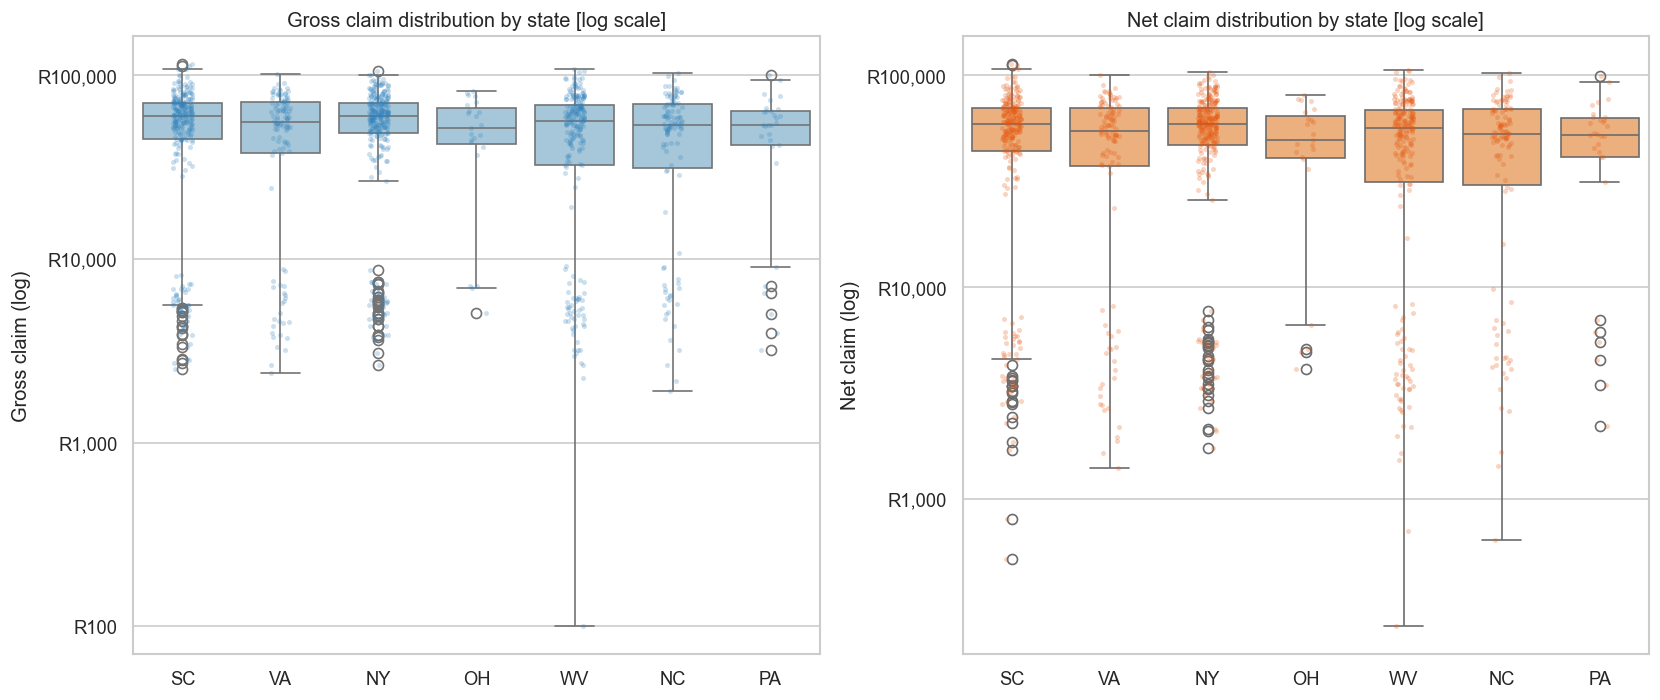

In [49]:

plt.close('all')
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# Left: Gross by state
sns.boxplot(data=df, x=STATE_COL, y=GROSS_COL, ax=axes[0], color='#9ecae1')
sns.stripplot(data=df, x=STATE_COL, y=GROSS_COL, ax=axes[0], color='#3182bd', alpha=0.25, size=3)
axes[0].set_yscale('log')  # reveals tails
axes[0].set_title('Gross claim distribution by state [log scale]')
axes[0].set_xlabel('')
axes[0].set_ylabel('Gross claim (log)')
axes[0].yaxis.set_major_formatter(fmt_rand)

# Right: Net by state
sns.boxplot(data=df[df['claim_net'] > 0], x=STATE_COL, y='claim_net', ax=axes[1], color='#fdae6b')
sns.stripplot(data=df[df['claim_net'] > 0], x=STATE_COL, y='claim_net', ax=axes[1], color='#e6550d', alpha=0.25, size=3)
axes[1].set_yscale('log')
axes[1].set_title('Net claim distribution by state [log scale]')
axes[1].set_xlabel('')
axes[1].set_ylabel('Net claim (log)')
axes[1].yaxis.set_major_formatter(fmt_rand)

plt.tight_layout()
plt.show()


**KEY INSIGHTS**


* Medians are broadly similar across states (gross & net), suggesting pricing/claim levels are consistent at the state level.
* **WV and OH show the widest spreads** and higher upper‑tails, indicating greater tail risk (large losses) in those states.
* SC and NY have more small‑value outliers, and these are further compressed on net, implying deductibles bite more on small claims there.
* Net ≈ Gross for most states at the median, so deductibles do not materially change state ranking; impact is mainly in the lower tail.

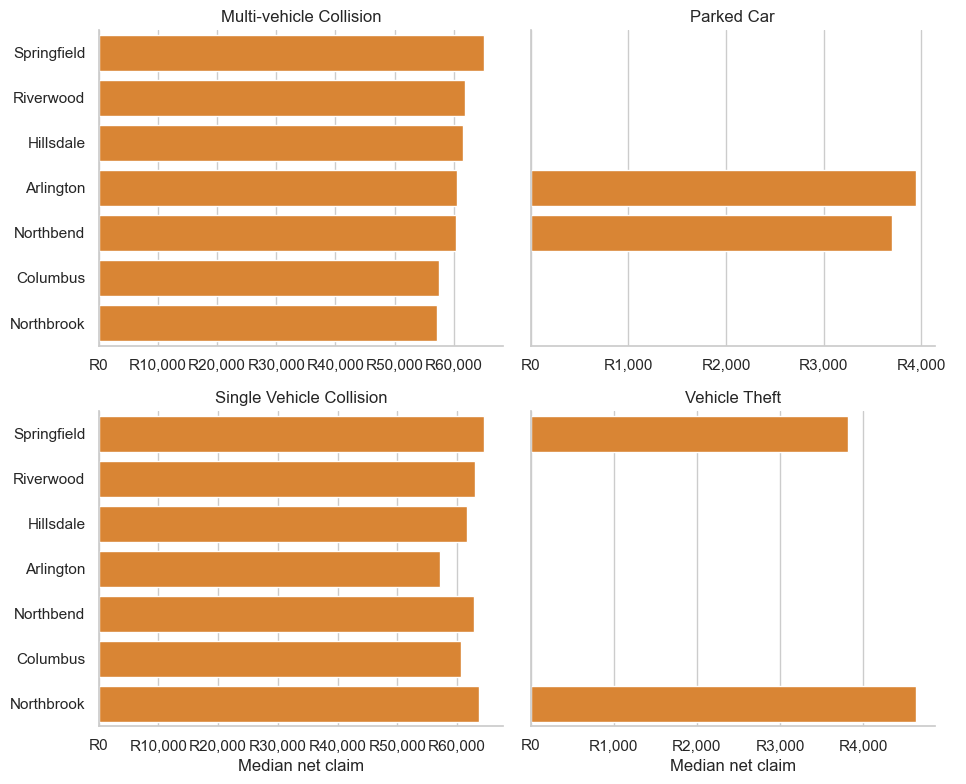

In [50]:

# Build per-incident-type top-N city medians (net)
MIN_N = 15
TOP_N = 10

inc_city = (
    df.groupby(['incident_type', CITY_COL])
      .agg(n=('policy_number', 'count'), med_net=('claim_net', 'median'))
      .reset_index()
)
inc_city = inc_city[inc_city['n'] >= MIN_N]

# Take top-N per incident_type
tops = (
    inc_city.sort_values(['incident_type', 'med_net'], ascending=[True, False])
            .groupby('incident_type')
            .head(TOP_N)
)

# Plot
g = sns.catplot(
    data=tops, kind='bar',
    x='med_net', y=CITY_COL,
    col='incident_type', col_wrap=2,
    sharex=False, height=4, aspect=1.2,
    color='#F58518'
)
g.set_titles('{col_name}')
g.set_xlabels('Median net claim')
g.set_ylabels('')
for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(fmt_rand)

plt.tight_layout()
plt.show()


**KEY INSIGHTS**


**Collisions (single & multi)**

Springfield consistently tops the list (≈ R55–60k), with Riverwood/Hillsdale/Northbrook close behind.
The city ordering is stable across single vs multi‑vehicle collisions → strong, persistent hotspots for collision severity.

**Parked Car**

Only a couple of cities meet the volume filter; medians are much lower (≈ R3–4k).
Indicates localized, small‑severity hotspots where deductibles likely have meaningful impact.


**Vehicle Theft**

Sparse hotspots (only one city passes the min‑N threshold), median ≈ R4k.
Suggests lower incident volume per city or dispersion; consider widening the time window or lowering MIN_N to surface theft patterns.

**Actions**

* Prioritize collision interventions (pricing, prevention, education) in Springfield first, then Riverwood/Hillsdale/Northbrook.
* For parked‑car hotspots, evaluate lower excess/micro‑cover to improve fairness on small claims.
* For theft, validate sample sizes; adjust filters or profile by coverage tier to confirm true hotspots.

<h3>
4) Segment clustering
 </h3>

**Goal:** Create practical risk–affordability segments for menu‑based products and targeted outreach.

In [92]:
# prep
df.columns = df.columns.str.strip()

# Required columns from your dataset
# affordability
AFF_COL = 'agi_simple'              # already calculated
# coverage tier for fair comparison (affordability differs by tier)
COV_COL = 'coverage_proxy'
# risk (we'll compute net; you also have log1p_total_claim_amount if you prefer)
GROSS_COL = 'total_claim_amount'
DED_COL   = 'policy_deductible'

# Hygiene
df[DED_COL] = df[DED_COL].fillna(0)
df['claim_net'] = np.maximum(df[GROSS_COL] - df[DED_COL], 0)

# --- Affordability index: percentile within coverage tier (removes tier bias) ---
# guard against zeros/NaNs in coverage
df = df[df[COV_COL].notna() & (df[COV_COL] > 0) & df[AFF_COL].notna()].copy()

def within_tier_percentile(s):
    # rank to [0,1] percentiles within group
    return s.rank(pct=True)

df['aff_pct_tier'] = (
    df.groupby(COV_COL, group_keys=False)[AFF_COL]
      .apply(within_tier_percentile)
)

# --- Risk index: percentile on log(1+net claim) within incident_type (composition control) ---
INC_COL = 'incident_type'
df['log1p_claim_net'] = np.log1p(df['claim_net'])

# If incident_type missing for some rows, use overall percentiles
def risk_percentile(group):
    return group.rank(pct=True)

if INC_COL in df.columns:
    df['risk_pct_type'] = (
        df.groupby(INC_COL, group_keys=False)['log1p_claim_net']
          .apply(risk_percentile)
    )
else:
    df['risk_pct_type'] = df['log1p_claim_net'].rank(pct=True)

# --- Banding into Low/Mid/High (tertiles) ---
def band_tertile(p):
    if p < 1/3:      return 'Low'
    elif p < 2/3:    return 'Mid'
    else:            return 'High'

df['AffordabilityBand'] = df['aff_pct_tier'].apply(band_tertile)
df['RiskBand']          = df['risk_pct_type'].apply(band_tertile)

df.to_csv("insurance_claims_clean_Data_V2.csv", index=False, encoding="utf-8")

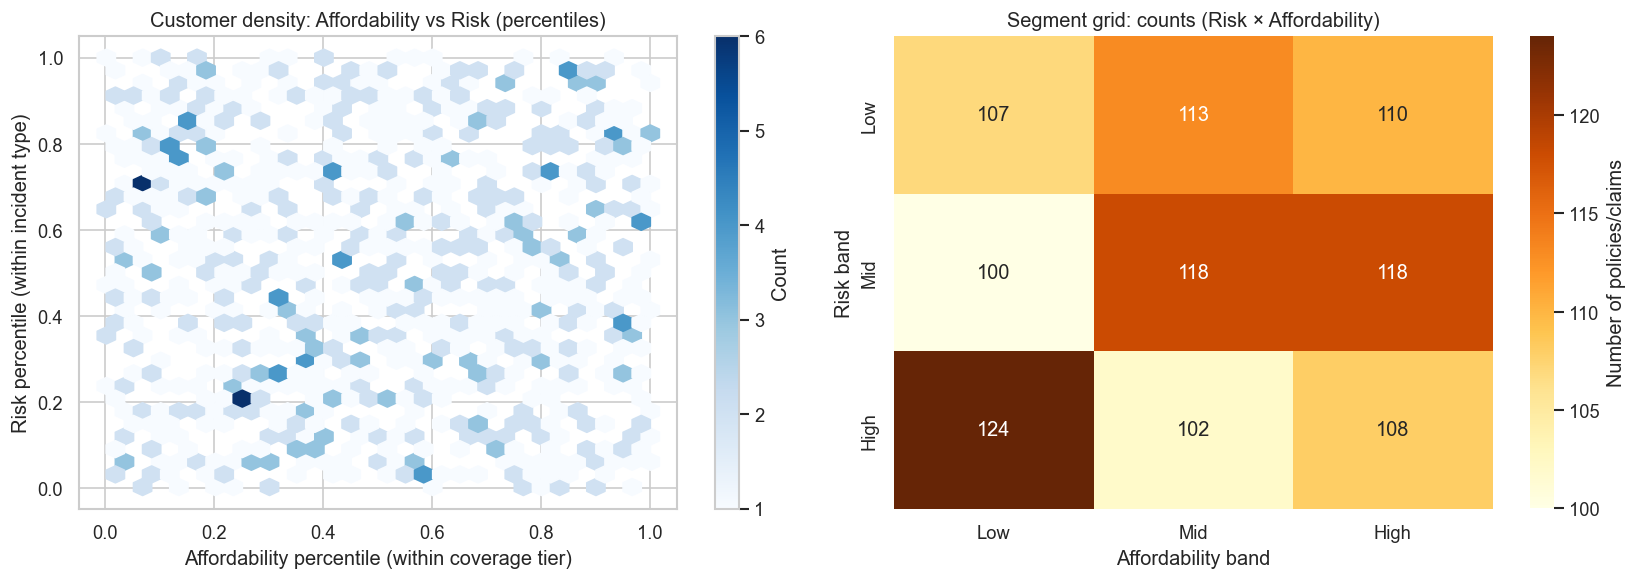

In [54]:

plt.close('all')
sns.set_theme(style="whitegrid")

# Left: Affordability vs Risk scatter density (hexbin)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=120)

hb = axes[0].hexbin(
    df['aff_pct_tier'], df['risk_pct_type'],
    gridsize=30, cmap='Blues', mincnt=1
)
axes[0].set_title('Customer density: Affordability vs Risk (percentiles)')
axes[0].set_xlabel('Affordability percentile (within coverage tier)')
axes[0].set_ylabel('Risk percentile (within incident type)')
cb = fig.colorbar(hb, ax=axes[0])
cb.set_label('Count')

# Right: 3×3 segment count heatmap (Low/Mid/High)
seg_counts = (
    df.groupby(['RiskBand','AffordabilityBand'])
      .size().reset_index(name='n')
)

# Pivot for heatmap with ordered bands
order = ['Low','Mid','High']
pivot_counts = (
    seg_counts.pivot(index='RiskBand', columns='AffordabilityBand', values='n')
              .reindex(index=order, columns=order)
)

sns.heatmap(
    pivot_counts, annot=True, fmt='.0f', cmap='YlOrBr',
    cbar_kws={'label': 'Number of policies/claims'},
    ax=axes[1]
)
axes[1].set_title('Segment grid: counts (Risk × Affordability)')
axes[1].set_xlabel('Affordability band')
axes[1].set_ylabel('Risk band')

plt.tight_layout()
plt.show()


**KEY INSIGHTS**


**Density (left):** Points are spread across the grid → no single dominant cluster.
Slightly more density in the high‑risk / low‑affordability area and around mid‑mid → these are the key groups.


**Segment grid (right):**

Biggest square: High Risk × Low Affordability (value shown as 124) → priority for risk‑reduction outreach while keeping cover affordable.
Strong mid segments: Mid Risk × Mid and Mid Risk × High (both 118) → good candidates for menu‑based upsell (limits/add‑ons) with affordability checks.

* Action: Start with the three biggest segments (HR×LA, MR×MA, MR×HA) for tailored offers and communications; keep monitoring movement between bands month‑over‑month.

<h3>
5) Driver sweep
 </h3>

**Goal:** Explore how claim amounts relate to demographics & policy features (age, education, occupation, premium, city/state, make/model)..

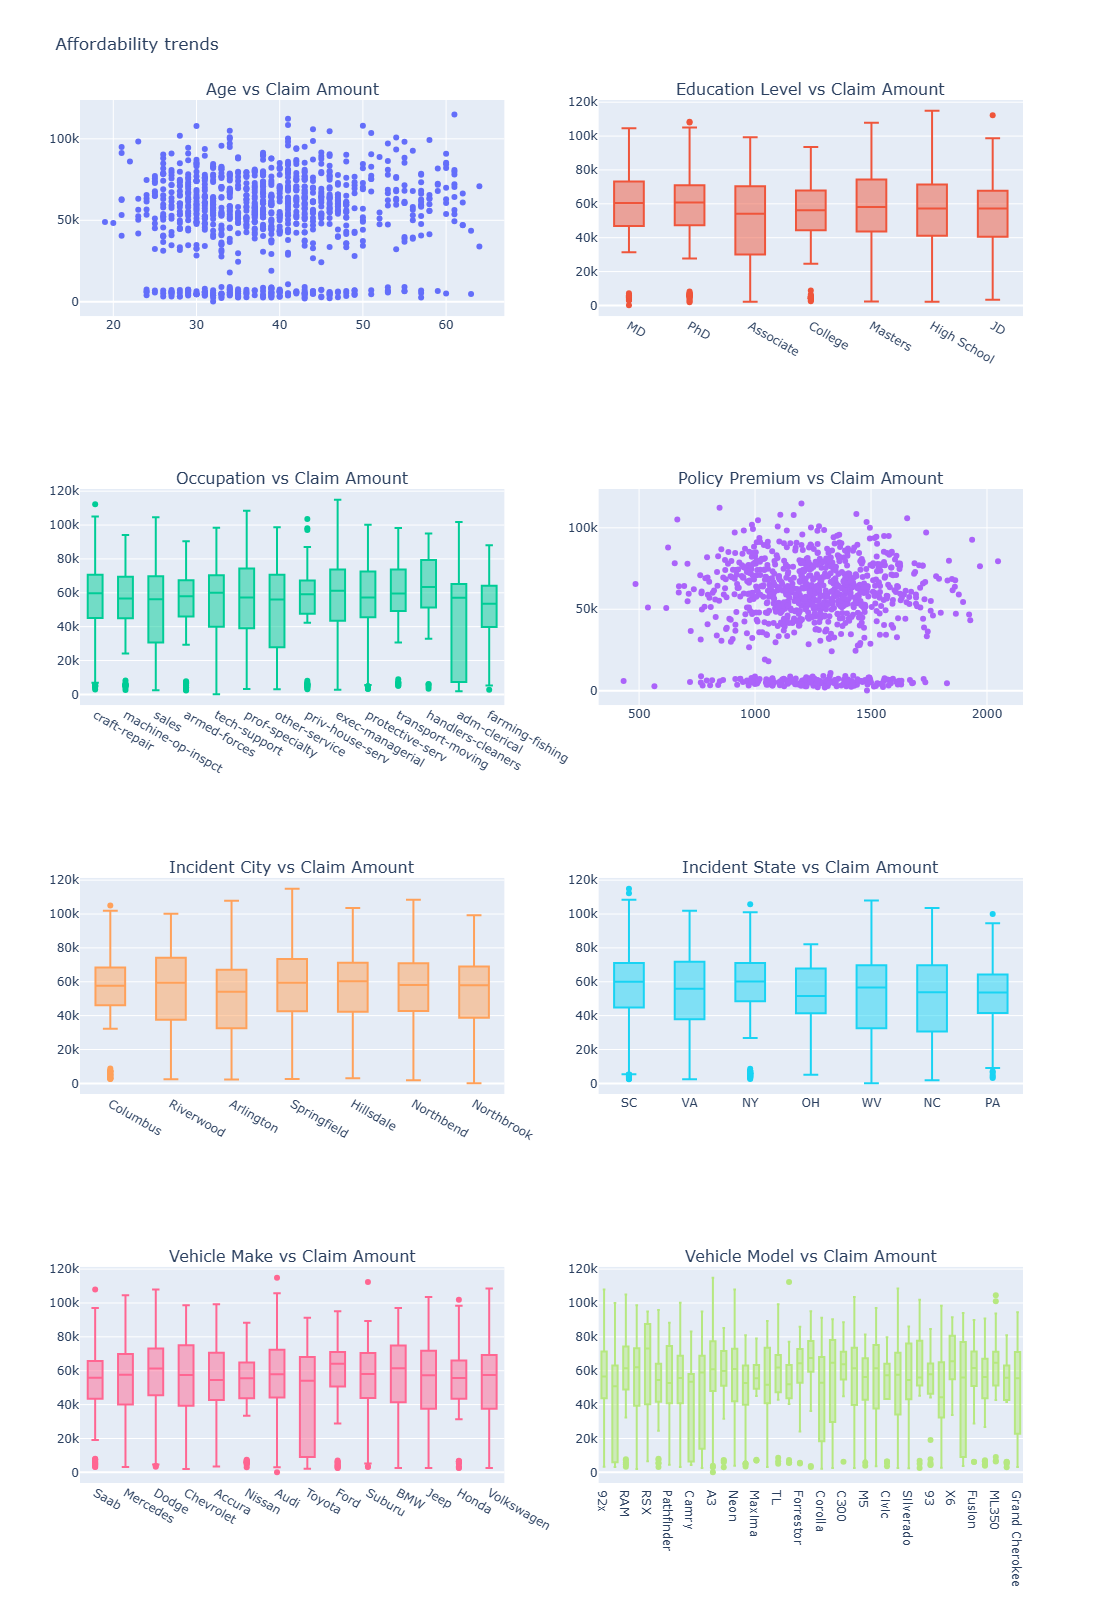

In [56]:

# Create 4 rows × 2 cols
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=[
        "Age vs Claim Amount",
        "Education Level vs Claim Amount",
        "Occupation vs Claim Amount",
        "Policy Premium vs Claim Amount",
        "Incident City vs Claim Amount",
        "Incident State vs Claim Amount",
        "Vehicle Make vs Claim Amount",
        "Vehicle Model vs Claim Amount"
    ]
)

# 1. Age vs Claim Amount
fig.add_trace(
    go.Scatter(x=df['age'], y=df['total_claim_amount'], mode='markers', name="Age"),
    row=1, col=1
)

# 2. Education Level vs Claim Amount
fig.add_trace(
    go.Box(x=df['insured_education_level'], y=df['total_claim_amount'], name="Education"),
    row=1, col=2
)

# 3. Occupation vs Claim Amount
fig.add_trace(
    go.Box(x=df['insured_occupation'], y=df['total_claim_amount'], name="Occupation"),
    row=2, col=1
)

# 4. Policy Premium vs Claim Amount
fig.add_trace(
    go.Scatter(x=df['policy_annual_premium'], y=df['total_claim_amount'], mode='markers', name="Premium"),
    row=2, col=2
)

# 5. Incident City vs Claim Amount
fig.add_trace(
    go.Box(x=df['incident_city'], y=df['total_claim_amount'], name="City"),
    row=3, col=1
)

# 6. Incident State vs Claim Amount
fig.add_trace(
    go.Box(x=df['incident_state'], y=df['total_claim_amount'], name="State"),
    row=3, col=2
)

# 7. Vehicle Make vs Claim Amount
fig.add_trace(
    go.Box(x=df['auto_make'], y=df['total_claim_amount'], name="Make"),
    row=4, col=1
)

# 8. Vehicle Model vs Claim Amount
fig.add_trace(
    go.Box(x=df['auto_model'], y=df['total_claim_amount'], name="Model"),
    row=4, col=2
)

# Layout settings
fig.update_layout(
    title_text="Affordability trends",
    height=1600, width=1000,
    showlegend=False
)

fig.show()

**1. Age vs Claim Amount**

* No clear trend—claims are widely spread across ages 20–65 with similar medians.
* A few high‑value outliers at older ages, but not systematic.
* **Action:** Age is not a strong severity driver; prioritize incident/risk features over demographics.

**2. Education Level vs Claim Amount**

* Medians are close and overlapping across education levels; differences are small vs variance.
* **Action:** Education is weak for severity segmentation—use for messaging tone (menu copy), not pricing.

**3. Occupation vs Claim Amount**

* Broad spreads with overlapping boxes; a few categories show higher tails, but not consistent.
* **Action:** Only consider occupation if specific classes have sufficient volume and stable uplift; otherwise, deprioritize.   

**4. Policy Premium vs Claim Amount***

* Scatter shows little correlation; higher premiums don’t imply higher claims.
* **Action:** Premium reflects pricing/coverage, not severity—use AGI for affordability and incident/vehicle attributes for risk.

**5. Incident City vs Claim Amount**

* Medians are highest in Springfield/Arlington, with wider upper tails → clear city hotspots.
* Columbus sits lower on median → relatively more affordable.
* **Action:** Prioritize targeted pricing/education in Springfield/Arlington; validate drivers (incident mix, coverage tier) per city.

**6. Incident State vs Claim Amount**

* State medians are broadly similar, but OH/WV show wider spreads and higher tails → more large‑loss risk.
* SC/NY display more small‑value outliers (likely deductible‑affected).
* **Action:** Focus tail‑risk controls in OH/WV; review small‑claim excess settings in SC/NY.

**7. Vehicle Make vs Claim Amount**

* Boxes overlap across makes; severity differences are mostly in the tails (e.g., premium brands show occasional high outliers).
* **Action:** Use model‑level granularity (and incident type) rather than make alone; filter to makes/models with sufficient volume.

**8. Vehicle Model vs Claim Amount**

* Many models with similar medians and varying tails; no single model dominates across the board.
* **Action:** Build top‑N model lists per incident type and per city/state to find practical hotspots; avoid thin categories.

 **Analysis of affordability trends based on key demographic and financial features**

**Summary Insights**

* Geography matters most: Clear city hotspots (e.g., Springfield, Arlington) with higher medians and wider upper tails; state-level tails are strongest in OH/WV.
* Vehicle features matter at model level: Makes are broadly similar; models show pockets of higher tails—use model + incident-type for granular risk controls.
* Demographics add limited signal: Age, education, occupation show overlapping distributions—not strong severity drivers; use mainly for outreach tone, not pricing.
* Premium ≠ severity: Little correlation between policy premium and claim amount—keep using AGI for affordability, and incident/vehicle/geography for risk.
* Deductibles mainly compress small claims: They don’t change hotspot rankings much; impact shows up in lower-tail incidents (e.g., parked‑car

<h3>
6) Fraud signals & fairness
 </h3>

**Goal:** Baseline fraud model that improves detection while monitoring parity across customer groups (avoid over‑flagging any one group).

In [90]:
# Fraud signals & fairness — prep
# Core fields
GROSS = 'total_claim_amount'
DED   = 'policy_deductible'
INC   = 'incident_type'
SEV   = 'incident_severity'
POLICE = 'police_report_available'
HOUR   = 'incident_hour_of_the_day'
TENURE = 'months_as_customer'

# Hygiene + net claim
df[DED] = df[DED].fillna(0)
df['claim_net'] = np.maximum(df[GROSS] - df[DED], 0)

# Frauds (reported flag)
df['fraud_flag'] = df['fraud_reported'].astype(str).str.upper().isin(['Y','YES','TRUE'])

# Existing recon fields in your data
df['recon_err_abs'] = df.get('claim_recon_error', 0).abs()
df['recon_flag']    = df.get('claim_recon_flag', False).astype(bool)
df['sum_parts']     = df.get('claim_sum_parts', np.nan)

# Derived anomaly flags (simple rules; tune thresholds as needed)
df['early_claim'] = (df[TENURE].fillna(999) <= 3)              # first 3 months
df['severe_no_police'] = (df[SEV].astype(str).str.contains('Major|Total', case=False, na=False)) & \
                         (~df[POLICE].astype(str).str.upper().isin(['Y','YES','TRUE']))
df['night_theft'] = (df[INC].astype(str).str.contains('Theft', case=False, na=False)) & \
                    (df[HOUR].fillna(-1).between(0, 5))        # 00:00–05:59 window
df['high_recon_err'] = df['recon_err_abs'] > 1000              # example threshold in currency units

# Keep only rows with claim amounts
df = df[df[GROSS].notna() & (df[GROSS] >= 0)]

df.to_csv("insurance_claims_clean_Data_V2.csv", index=False, encoding="utf-8")

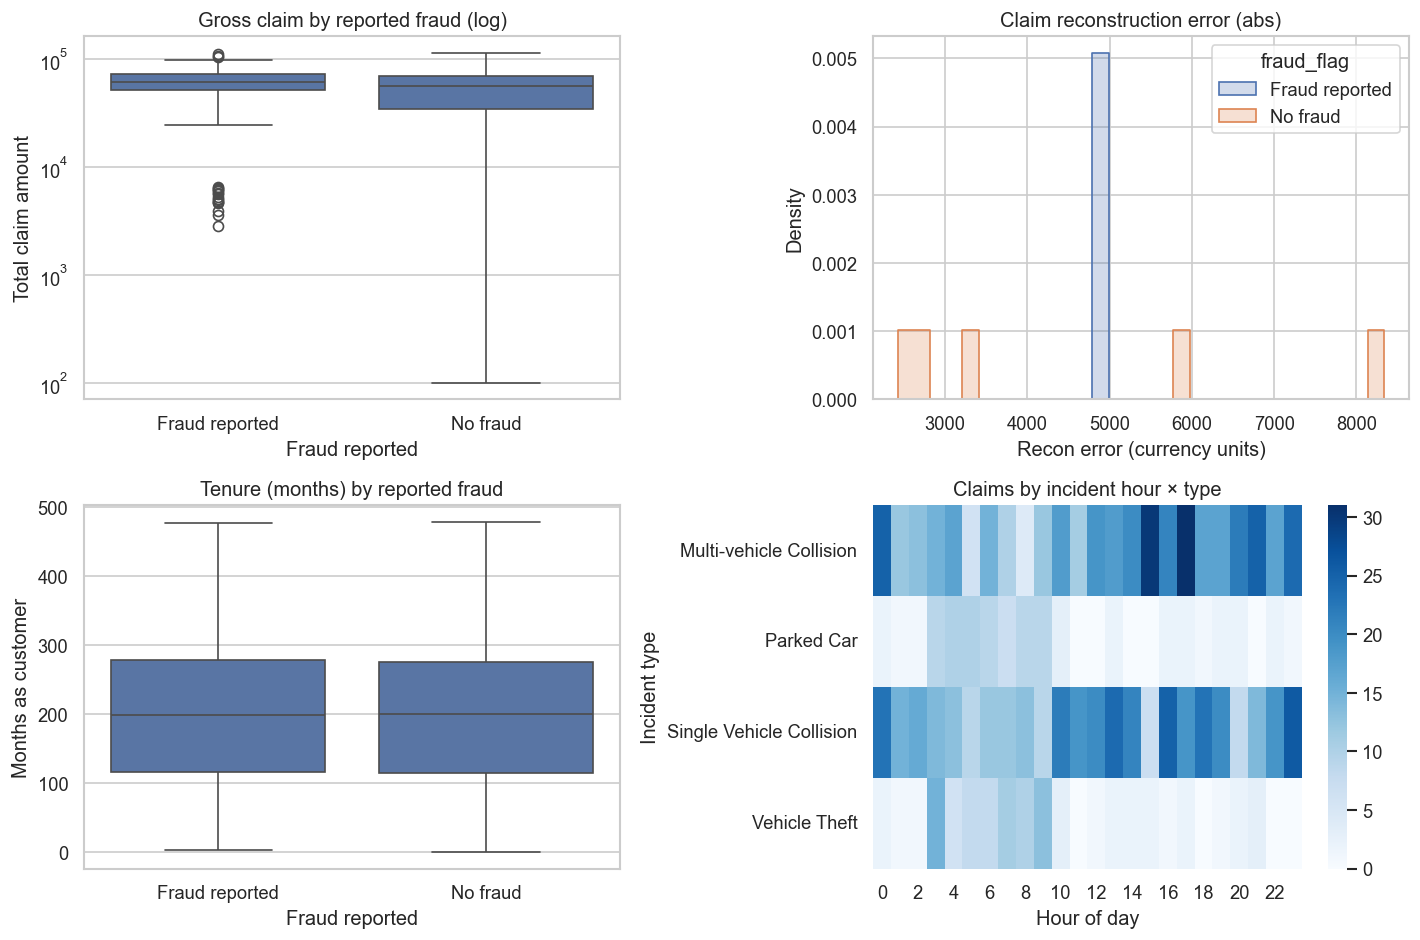

In [91]:

# ---- Fraud signals: robust 2×2 figure (no aliases, graphs only) ----
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Use cleaned data if available
try:
    base = df_cleaned
except NameError:
    base = df

# Work on a copy for plotting
df_viz = base.copy()
df_viz.columns = df_viz.columns.str.strip()

# --- Quick fixes to ensure proper types/labels ---
# Fraud flag (string labels rather than booleans to avoid weird hue/index issues)
df_viz['fraud_flag'] = np.where(
    df_viz.get('fraud_reported', '').astype(str).str.upper().isin(['Y','YES','TRUE']),
    'Fraud reported', 'No fraud'
)

# Numeric conversions
df_viz['total_claim_amount'] = pd.to_numeric(df_viz.get('total_claim_amount'), errors='coerce')
df_viz['policy_deductible']  = pd.to_numeric(df_viz.get('policy_deductible'), errors='coerce').fillna(0)
df_viz['months_as_customer'] = pd.to_numeric(df_viz.get('months_as_customer'), errors='coerce')

# Derived (optional)
df_viz['claim_recon_error'] = pd.to_numeric(df_viz.get('claim_recon_error', 0), errors='coerce')
df_viz['recon_err_abs']     = df_viz['claim_recon_error'].abs()

# Cast hour/type for the heatmap
df_viz['incident_hour_of_the_day'] = pd.to_numeric(df_viz.get('incident_hour_of_the_day'), errors='coerce')
df_viz['incident_type']            = df_viz.get('incident_type', '').astype(str).str.strip()

# Plot subset (log-scale needs positive amounts)
df_plot = df_viz[(df_viz['total_claim_amount'].notna()) & (df_viz['total_claim_amount'] > 0)].copy()

plt.close('all')
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=120)

# A) Gross claim by reported fraud (log)
sns.boxplot(
    data=df_plot, x='fraud_flag', y='total_claim_amount', ax=axes[0,0]
)
axes[0,0].set_yscale('log')
axes[0,0].set_title('Gross claim by reported fraud (log)')
axes[0,0].set_xlabel('Fraud reported')
axes[0,0].set_ylabel('Total claim amount')

# B) Reconstruction error distribution (absolute)
df_recon = df_plot[df_plot['recon_err_abs'] > 0]
sns.histplot(
    data=df_recon, x='recon_err_abs', hue='fraud_flag',
    bins=30, ax=axes[0,1], element='step', stat='density', common_norm=False
)
axes[0,1].set_title('Claim reconstruction error (abs)')
axes[0,1].set_xlabel('Recon error (currency units)')
axes[0,1].set_ylabel('Density')

# C) Tenure vs reported fraud
sns.boxplot(
    data=df_plot[df_plot['months_as_customer'].notna()],
    x='fraud_flag', y='months_as_customer', ax=axes[1,0]
)
axes[1,0].set_title('Tenure (months) by reported fraud')
axes[1,0].set_xlabel('Fraud reported')
axes[1,0].set_ylabel('Months as customer')

# D) Heatmap — incident hour × incident type (counts)
hour_type = (
    df_plot.dropna(subset=['incident_hour_of_the_day'])
           .groupby(['incident_type', 'incident_hour_of_the_day'])
           .size().rename('n').reset_index()
)
pivot = hour_type.pivot(index='incident_type', columns='incident_hour_of_the_day', values='n').fillna(0)
sns.heatmap(pivot, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Claims by incident hour × type')
axes[1,1].set_xlabel('Hour of day')
axes[1,1].set_ylabel('Incident type')

plt.tight_layout()
plt.show()



**KEY INSIGHTS**


**Gross claim vs fraud reported (log scale)**
* Medians are similar for Fraud reported and No fraud → the raw fraud flag is not a strong severity signal on its own. Use derived checks alongside it.

**Claim reconstruction error (absolute)**
A distinct spike around ~R5k for Fraud reported appears, while No fraud is more dispersed at lower densities. This mode is a good review trigger (possible mismatch between total vs sum of parts).

**Tenure by fraud reported**
Distributions look very similar across the two groups → tenure alone doesn’t separate fraud vs non‑fraud in this sample.

**Claims by hour × incident type (heatmap)**
Collisions cluster in the afternoon/evening hours; parked‑car incidents are lower and more diffuse; vehicle theft has sparse counts. Time‑of‑day is useful operationally (e.g., focused checks during busier collision windows).

In [89]:

# --- Fairness monitoring (graphs only) ---

# Columns
AFF = 'agi_simple'
NET = 'claim_net'  # compute if missing
COV = 'coverage_proxy'
CITY = 'incident_city'
GROUP = 'insured_sex'              # change to 'insured_education_level' to compare education

# Ensure claim_net exists
if NET not in df.columns and 'total_claim_amount' in df.columns and 'policy_deductible' in df.columns:
    df['policy_deductible'] = pd.to_numeric(df['policy_deductible'], errors='coerce').fillna(0)
    df['total_claim_amount'] = pd.to_numeric(df['total_claim_amount'], errors='coerce')
    df[NET] = np.maximum(df['total_claim_amount'] - df['policy_deductible'], 0)

# Basic hygiene
df = df.dropna(subset=[AFF, NET, COV, GROUP])
df[GROUP] = df[GROUP].astype(str).str.strip()

# Focus on the 3 most common coverage tiers (your proxy is discrete)
top_tiers = df[COV].value_counts().head(3).index.tolist()
df_t = df[df[COV].isin(top_tiers)].copy()


# Median AGI by group, faceted by coverage tier
g1 = sns.catplot(
    data=df_t, kind='bar',
    x=GROUP, y=AFF, col=COV, col_wrap=3,
    estimator=np.median,
    errorbar=None,            # ← replace ci=None
    height=3.6, aspect=1.1, color='#4C78A8'
)

# Median net claim by group, faceted by coverage tier
g2 = sns.catplot(
    data=df_t, kind='bar',
    x=GROUP, y=NET, col=COV, col_wrap=3,
    estimator=np.median,
    errorbar=None,            # ← replace ci=None
    height=3.6, aspect=1.1, color='#F58518'
)
df.to_csv("insurance_claims_clean_Data_V2.csv", index=False, encoding="utf-8")

**Rule‑based Fraud Score**

In [88]:

# --- Rule-based fraud score (0-100), robust version ---
import numpy as np
import pandas as pd

# Use cleaned frame if available
try:
    base = df_cleaned
except NameError:
    base = df

df_s = base.copy()
df_s.columns = df_s.columns.str.strip()

# Aliases
GROSS   = 'total_claim_amount'
DED     = 'policy_deductible'
SEV     = 'incident_severity'
POLICE  = 'police_report_available'
INC     = 'incident_type'
HOUR    = 'incident_hour_of_the_day'
TENURE  = 'months_as_customer'
AGI     = 'agi_simple'
AGI_DEC = 'agi_decile'
SUMPART = 'claim_sum_parts'
RECON   = 'claim_recon_error'

# Hygiene / type coercion
df_s[GROSS] = pd.to_numeric(df_s.get(GROSS), errors='coerce').fillna(0)
df_s[DED]   = pd.to_numeric(df_s.get(DED),   errors='coerce').fillna(0)
df_s[HOUR]  = pd.to_numeric(df_s.get(HOUR),  errors='coerce')
df_s[TENURE]= pd.to_numeric(df_s.get(TENURE),errors='coerce')
df_s[RECON] = pd.to_numeric(df_s.get(RECON), errors='coerce').fillna(0)

# Sum of parts may be missing; create a NaN column if absent
if SUMPART not in df_s.columns:
    df_s[SUMPART] = np.nan
else:
    df_s[SUMPART] = pd.to_numeric(df_s[SUMPART], errors='coerce')

# Ensure AGI exists; if not, recompute from components (alpha=0.3 by default)
if AGI not in df_s.columns or df_s[AGI].isna().all():
    alpha = 0.3
    df_s['premium_per_coverage'] = pd.to_numeric(df_s.get('premium_per_coverage'), errors='coerce')
    df_s['deductible_ratio']     = pd.to_numeric(df_s.get('deductible_ratio'),     errors='coerce')
    df_s[AGI] = df_s['premium_per_coverage'] * (1 + alpha * df_s['deductible_ratio'])

# Ensure AGI deciles exist; otherwise build them
if AGI_DEC not in df_s.columns or df_s[AGI_DEC].isna().all():
    # Guard against all-NaN AGI
    valid_agi = df_s[AGI].dropna()
    if valid_agi.empty:
        # fallback: no AGI available → mark as not high
        df_s[AGI_DEC] = np.nan
    else:
        df_s[AGI_DEC] = pd.qcut(df_s[AGI], q=10, labels=range(1, 11), duplicates='drop')

# Convert deciles safely and create agi_high flag
df_s['agi_decile_num'] = pd.to_numeric(df_s[AGI_DEC], errors='coerce')
df_s['agi_high'] = df_s['agi_decile_num'] >= 9  # deciles 9–10

# Derived signals
df_s['recon_err_abs'] = df_s[RECON].abs()
df_s['early_claim'] = (df_s[TENURE].fillna(999) <= 3)

df_s['severe_no_police'] = (
    df_s.get(SEV, '').astype(str).str.contains('Major|Total', case=False, na=False) &
    ~df_s.get(POLICE, '').astype(str).str.upper().isin(['Y','YES','TRUE'])
)

df_s['night_theft'] = (
    df_s.get(INC, '').astype(str).str.contains('Theft', case=False, na=False) &
    df_s[HOUR].between(0, 5, inclusive='both')
)

df_s['odd_hour_collision'] = (
    df_s.get(INC, '').astype(str).str.contains('Collision', case=False, na=False) &
    (df_s[HOUR].between(22, 23, inclusive='both') | df_s[HOUR].between(0, 5, inclusive='both'))
)

# Sum-of-parts mismatch (ratio) — only when both amounts exist and gross>0
df_s['sum_parts_ratio_diff'] = np.where(
    (df_s[GROSS] > 0) & df_s[SUMPART].notna(),
    np.abs(df_s[GROSS] - df_s[SUMPART]) / df_s[GROSS],
    np.nan
)

# Thresholded booleans
df_s['recon_err_abs_high']   = df_s['recon_err_abs'] >= 2000       # tune threshold
df_s['sum_parts_ratio_high'] = df_s['sum_parts_ratio_diff'].fillna(0) >= 0.10  # >=10%

# Weights (tune as you learn from reviews)
weights = {
    'severe_no_police'     : 30,
    'recon_err_abs_high'   : 25,
    'early_claim'          : 20,
    'night_theft'          : 15,
    'odd_hour_collision'   : 10,
    'sum_parts_ratio_high' : 15,
    'agi_high'             : 10
}

# Total points
df_s['fraud_points'] = (
    df_s['severe_no_police'].astype(int)     * weights['severe_no_police']   +
    df_s['recon_err_abs_high'].astype(int)   * weights['recon_err_abs_high'] +
    df_s['early_claim'].astype(int)          * weights['early_claim']        +
    df_s['night_theft'].astype(int)          * weights['night_theft']        +
    df_s['odd_hour_collision'].astype(int)   * weights['odd_hour_collision'] +
    df_s['sum_parts_ratio_high'].astype(int) * weights['sum_parts_ratio_high'] +
    df_s['agi_high'].astype(int)             * weights['agi_high']
)

# Scale to 0–100
max_points = float(sum(weights.values()))
df_s['fraud_score'] = (df_s['fraud_points'] / max_points * 100).round(1)

# Triage bands
def triage(score):
    if score >= 70: return 'Review'
    elif score >= 50: return 'Watchlist'
    else: return 'Pass'

df_s['fraud_band'] = df_s['fraud_score'].apply(triage)
df.to_csv("insurance_claims_clean_Data_V2.csv", index=False, encoding="utf-8")


**Velocity & repeat‑claim checks**

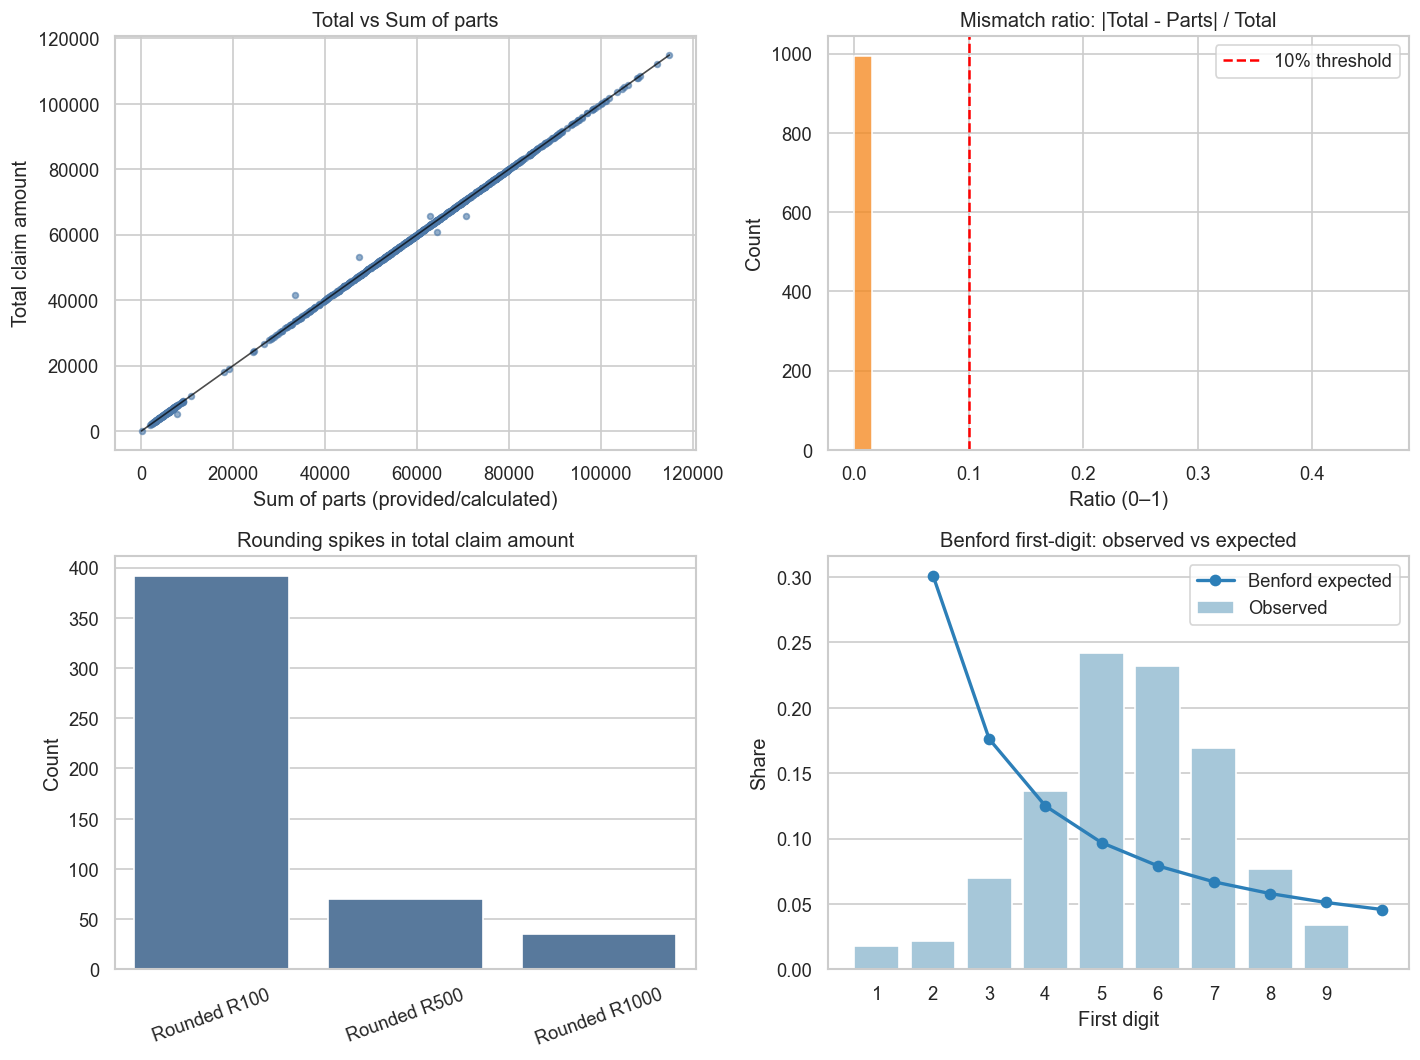

In [107]:

# --- Amount integrity: sum-of-parts, rounding spikes, Benford (graphs only) ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Use cleaned frame if available
try:
    base = df_cleaned
except NameError:
    base = df

df_a = base.copy()
df_a.columns = df_a.columns.str.strip()

# Columns
TOTAL   = 'total_claim_amount'
INJ     = 'injury_claim'
PROP    = 'property_claim'
VEH     = 'vehicle_claim'
SUMPART = 'claim_sum_parts'      # present in your dataset
RECON   = 'claim_recon_error'    # present in your dataset

# Coerce to numeric and handle NaNs
for c in [TOTAL, INJ, PROP, VEH, SUMPART, RECON]:
    if c in df_a.columns:
        df_a[c] = pd.to_numeric(df_a[c], errors='coerce')

# Compute "sum of parts" (from components) to validate provided SUMPART
df_a['sum_calc'] = df_a[[INJ, PROP, VEH]].sum(axis=1, min_count=1)

# Choose a working "sum of parts": prefer provided column if populated, else use sum_calc
if SUMPART in df_a.columns and df_a[SUMPART].notna().any():
    df_a['sum_parts_work'] = df_a[SUMPART].fillna(df_a['sum_calc'])
else:
    df_a['sum_parts_work'] = df_a['sum_calc']

# Reconstruction error (abs) — prefer existing column, else compute
if RECON in df_a.columns and df_a[RECON].notna().any():
    df_a['recon_err_abs'] = df_a[RECON].abs()
else:
    df_a['recon_err_abs'] = (df_a[TOTAL] - df_a['sum_parts_work']).abs()

# Mismatch ratio (% of total) — only when total > 0 and sum exists
df_a['parts_mismatch_ratio'] = np.where(
    (df_a[TOTAL] > 0) & df_a['sum_parts_work'].notna(),
    np.abs(df_a[TOTAL] - df_a['sum_parts_work']) / df_a[TOTAL],
    np.nan
)

# Rounding spikes flags
df_a['rounded_100']  = (df_a[TOTAL] % 100).fillna(np.nan) == 0
df_a['rounded_500']  = (df_a[TOTAL] % 500).fillna(np.nan) == 0
df_a['rounded_1000'] = (df_a[TOTAL] % 1000).fillna(np.nan) == 0

# Benford first digit (on positive totals)
def first_digit_pos(x):
    try:
        x = float(x)
        if x <= 0 or not np.isfinite(x):
            return np.nan
        while x >= 10:
            x /= 10
        while x < 1:
            x *= 10
        d = int(x)
        return d if 1 <= d <= 9 else np.nan
    except Exception:
        return np.nan

df_pos = df_a[df_a[TOTAL].astype(float) > 0].copy()
df_pos['first_digit'] = df_pos[TOTAL].map(first_digit_pos)

observed = df_pos['first_digit'].value_counts(normalize=True).sort_index()
expected = pd.Series({d: np.log10(1 + 1/d) for d in range(1, 10)})

# --- Plotting ---
plt.close('all')
fig, axes = plt.subplots(2, 2, figsize=(12, 9), dpi=120)

# A) Sum of parts vs Total (hexbin or scatter depending on volume)
dsp = df_a.dropna(subset=[TOTAL, 'sum_parts_work'])
if len(dsp) > 0:
    if len(dsp) > 1000:
        hb = axes[0,0].hexbin(dsp['sum_parts_work'], dsp[TOTAL], gridsize=35, cmap='Blues', mincnt=1)
        cb = fig.colorbar(hb, ax=axes[0,0]); cb.set_label('Count')
    else:
        axes[0,0].scatter(dsp['sum_parts_work'], dsp[TOTAL], s=12, alpha=0.6, color='#4C78A8')
    # y=x reference
    lim = max(dsp['sum_parts_work'].max(), dsp[TOTAL].max())
    axes[0,0].plot([0, lim], [0, lim], color='black', lw=1, alpha=0.7)
    axes[0,0].set_title('Total vs Sum of parts')
    axes[0,0].set_xlabel('Sum of parts (provided/calculated)')
    axes[0,0].set_ylabel('Total claim amount')
else:
    axes[0,0].text(0.5, 0.5, 'No rows with total & parts', ha='center', va='center')
    axes[0,0].set_axis_off()

# B) Mismatch ratio histogram (highlight ≥10%)
mis = df_a['parts_mismatch_ratio'].dropna()
if len(mis) > 0:
    sns.histplot(mis, bins=30, ax=axes[0,1], color='#F58518')
    axes[0,1].axvline(0.10, color='red', lw=1.5, linestyle='--', label='10% threshold')
    axes[0,1].set_title('Mismatch ratio: |Total - Parts| / Total')
    axes[0,1].set_xlabel('Ratio (0–1)')
    axes[0,1].set_ylabel('Count')
    axes[0,1].legend()
else:
    axes[0,1].text(0.5, 0.5, 'No mismatch ratios (insufficient totals/parts)', ha='center', va='center')
    axes[0,1].set_axis_off()

# C) Rounding spikes (counts)
round_counts = pd.DataFrame({
    'Flag': ['Rounded R100', 'Rounded R500', 'Rounded R1000'],
    'Count': [
        int(df_a['rounded_100'].sum(skipna=True)),
        int(df_a['rounded_500'].sum(skipna=True)),
        int(df_a['rounded_1000'].sum(skipna=True)),
    ]
})
sns.barplot(data=round_counts, x='Flag', y='Count', ax=axes[1,0], color='#4C78A8')
axes[1,0].set_title('Rounding spikes in total claim amount')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=20)

# D) Benford first digit: observed vs expected
if observed.size > 0:
    ben = pd.DataFrame({
        'digit': range(1,10),
        'observed': [observed.get(d, 0) for d in range(1,10)],
        'expected': [expected.get(d, 0) for d in range(1,10)]
    })
    sns.barplot(data=ben, x='digit', y='observed', ax=axes[1,1], color='#9ecae1', label='Observed')
    axes[1,1].plot(ben['digit'], ben['expected'], color='#2c7fb8', lw=2, marker='o', label='Benford expected')
    axes[1,1].set_title('Benford first-digit: observed vs expected')
    axes[1,1].set_xlabel('First digit')
    axes[1,1].set_ylabel('Share')
    axes[1,1].legend()
else:
    axes[1,1].text(0.5, 0.5, 'No positive totals → Benford not applicable', ha='center', va='center')
    axes[1,1].set_axis_off()

plt.tight_layout()
plt.show()



**KEY INSIGHTS**

**Total vs Sum of parts**
* Points sit tightly on the y = x line ⇒ totals reconcile well with injury/property/vehicle components. Only a few mild deviations at higher amounts.

**Mismatch ratio:** |Total − Parts| / Total
* Distribution is concentrated at ~0–2%; virtually no cases ≥10% (red line).

**Rounding spikes in total claim amount**
Insight: Clear spike at R100 multiples, with smaller spikes at R500 and R1,000 ⇒ likely manual/rounded entries rather than precise invoicing.

** Benford first‑digit: observed vs expected**
* Lower share of ‘1–2’ and higher around ‘4–6’ vs Benford’s curve. This often reflects coverage tiers / standard pricing bands, not fraud by itself

**<u>Marketing strategy suggestions</u>**

**1. Segmented Product Offers**

* Target by Age, Education, and Occupation:
Use insights from the data to create tailored insurance products for groups with lower affordability or higher claim rates (e.g., young professionals, certain occupations).
* Flexible Premiums:
Offer flexible payment plans or discounts for segments with lower average incomes or higher price sensitivity.

**2. Value-Based Messaging**

* Highlight Value for Money:
Emphasize the benefits and coverage provided for the premium, especially for segments paying higher premiums but making fewer claims.
* Risk Reduction Incentives:
Promote safe driving, home safety, or health programs with premium discounts for participation.

**3. Geographic Targeting**

* City/State Campaigns:
Focus marketing in cities or states with higher claim amounts or premiums, offering localized promotions or educational content about risk management.

**4. Vehicle-Specific Campaigns**

* Custom Offers by Vehicle Make/Model:
Develop special rates or add-ons for popular or high-claim vehicle types, and promote these through auto dealerships or service centers.

**5. Retention and Upsell**

* Reward Loyalty:
Offer loyalty discounts or bundled products to retain customers with a history of low claims.
* Upsell Add-Ons:
Suggest relevant add-ons (e.g., roadside assistance, theft protection) to customers with higher-value vehicles or in high-risk areas.

**6. Digital Engagement**

* Personalized Online Tools:
Provide online calculators or quote tools that show how premiums are determined, increasing transparency and trust.
* Educational Content:
Share tips on reducing claims and improving affordability via blogs, webinars, or social media.

**7. Data-Driven Outreach**

* Predictive Targeting:
Use predictive analytics to identify customers likely to churn due to affordability and proactively offer them better deals or payment options.
* Feedback Loops:
Regularly survey customers about affordability concerns and adjust offerings accordingly.

In [109]:

# 5. Data Cleaning & Feature Engineering (robust, in-place)
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Use cleaned frame if available
try:
    base = df_cleaned
except NameError:
    base = df

df = base.copy()
df.columns = df.columns.str.strip()

# --- 1) Identify column sets ---
cat_cols  = df.select_dtypes(include=['object','category']).columns.tolist()
num_cols  = df.select_dtypes(include=[np.number]).columns.tolist()
date_cols = [c for c in df.columns if 'date' in c.lower()]

# Exclude IDs / free-text from encoding (adjust as needed)
exclude_cat = ['policy_number', 'incident_location']
cat_cols = [c for c in cat_cols if c not in exclude_cat]

# --- 2) Fill missing values separately ---
# Categorical: 'Unknown'
df[cat_cols] = df[cat_cols].astype('string').fillna('Unknown')

# Numeric: coerce to numeric, fill with column medians
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

# --- 3) Convert date columns to numeric feature(s) ---
for col in date_cols:
    dt = pd.to_datetime(df[col], errors='coerce')
    # days since 1970-01-01; use -1 for missing
    df[col + '_days'] = (dt - pd.Timestamp('1970-01-01')).dt.days.fillna(-1).astype(int)

# --- 4) Encode categorical variables (LabelEncoder per column) ---
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# --- 5) Scale numeric columns (once) ---
# Refresh numeric list after date conversions + categorical encodings
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



              precision    recall  f1-score   support

           0       0.77      0.97      0.86       151
           1       0.50      0.08      0.14        49

    accuracy                           0.76       200
   macro avg       0.63      0.53      0.50       200
weighted avg       0.70      0.76      0.68       200

ROC-AUC: 0.836


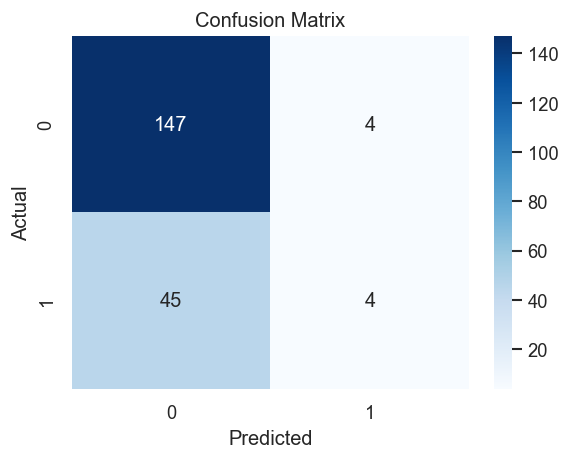

In [112]:

# 6. Modeling: Fraud Detection (RandomForest + imputation)
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

sns.set_theme(style="whitegrid")

# --- Source data ---
try:
    base = df_cleaned
except NameError:
    base = df

dfm = base.copy()
dfm.columns = dfm.columns.str.strip()

# --- Target: map to 1/0 (Y/YES/TRUE -> 1; N/NO/FALSE -> 0) ---
if 'fraud_reported' not in dfm.columns:
    raise ValueError("Missing target column 'fraud_reported'.")

y = (dfm['fraud_reported'].astype(str).str.upper()
     .map({'Y':1,'YES':1,'TRUE':1,'N':0,'NO':0,'FALSE':0})
     .fillna(0).astype(int))

# --- Date → numeric (days since epoch) ---
date_cols = [c for c in dfm.columns if 'date' in c.lower()]
for c in date_cols:
    dt = pd.to_datetime(dfm[c], errors='coerce')
    dfm[c + '_days'] = (dt - pd.Timestamp('1970-01-01')).dt.days.fillna(-1).astype(int)

# --- Feature sets ---
DROP_FREE_TEXT = True
free_text_to_drop = ['incident_location'] if DROP_FREE_TEXT else []

cat_cols = dfm.select_dtypes(include=['object','category']).columns.tolist()
exclude_cat = ['policy_number'] + free_text_to_drop + ['fraud_reported']  # exclude target + ID/free-text
cat_cols = [c for c in cat_cols if c not in exclude_cat]

num_cols = dfm.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'fraud_reported']  # safety

use_cols = cat_cols + num_cols

# --- Preprocess: impute missing + encode cats, impute numerics ---
preprocess = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            # ('scale', StandardScaler())  # not needed for RF
        ]), num_cols)
    ],
    remainder='drop'
)

clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

pipe = Pipeline([
    ('prep', preprocess),
    ('clf', clf)
])

# --- Train/test split (stratify only if 2+ classes) ---
stratify_param = y if y.nunique() > 1 else None
X_train, X_test, y_train, y_test = train_test_split(
    dfm[use_cols], y, test_size=0.2, random_state=42, stratify=stratify_param
)

# --- Fit & evaluate ---
pipe.fit(X_train, y_train)
y_pred  = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else None

print(classification_report(y_test, y_pred))
if y_proba is not None and y_test.nunique() > 1:
    print("ROC-AUC:", f"{roc_auc_score(y_test, y_proba):.3f}")
else:
    print("ROC-AUC: not applicable (no probability or single class)")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4), dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout(); plt.show()


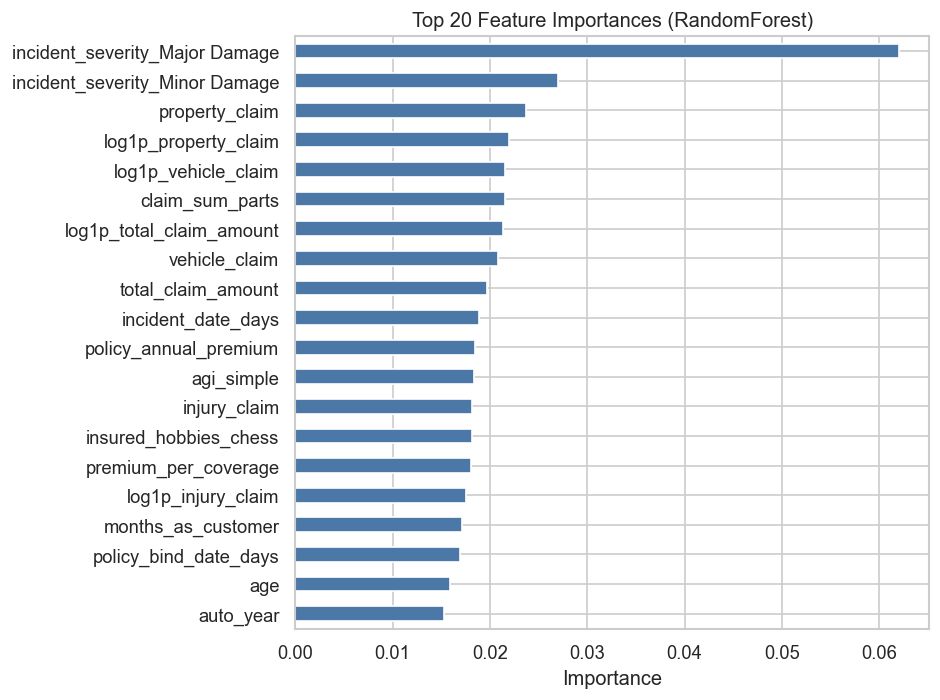

In [114]:

# 7. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


                  Model  ROC-AUC (mean)  PR-AUC (mean)  ROC-AUC (std)  \
2  HistGradientBoosting        0.855892       0.624929       0.018642   
1          RandomForest        0.843335       0.584195       0.012918   
0   Logistic (baseline)        0.596055       0.314979       0.043806   

   PR-AUC (std)  
2      0.064437  
1      0.048279  
0      0.043845  
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       151
           1       0.70      0.29      0.41        49

    accuracy                           0.80       200
   macro avg       0.75      0.62      0.64       200
weighted avg       0.78      0.80      0.76       200

ROC-AUC: 0.856
PR-AUC: 0.593


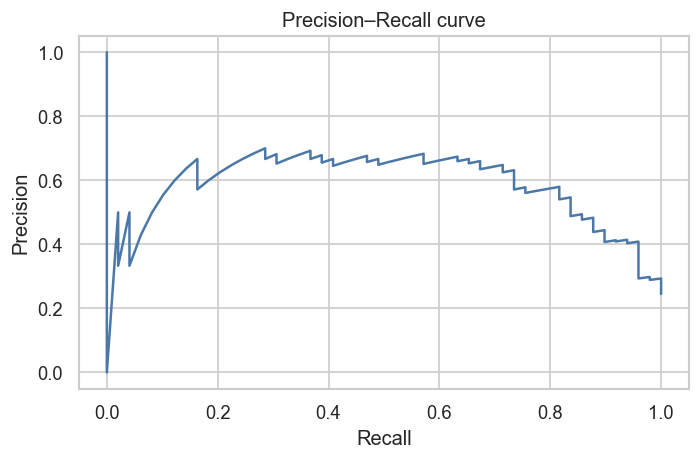

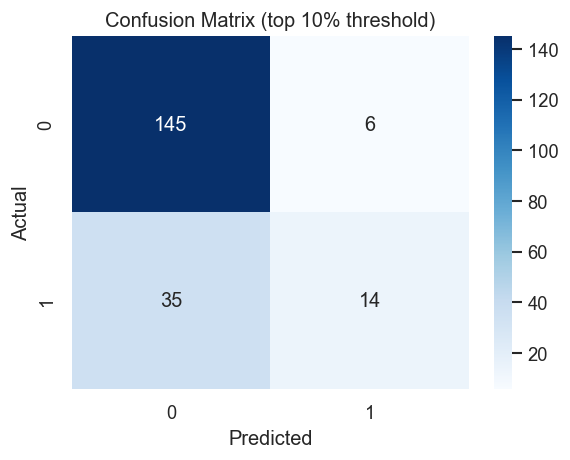

AttributeError: 'CalibratedClassifierCV' object has no attribute 'base_estimator'

In [121]:

# === Model comparison + Final model training ===
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.calibration import CalibratedClassifierCV
import joblib

sns.set_theme(style="whitegrid")

# --- Source data ---
try:
    base = df_cleaned
except NameError:
    base = df
dfm = base.copy()
dfm.columns = dfm.columns.str.strip()

# --- Target ---
y = (dfm['fraud_reported'].astype(str).str.upper()
     .map({'Y':1,'YES':1,'TRUE':1,'N':0,'NO':0,'FALSE':0})
     .fillna(0).astype(int))

# --- Date -> numeric ---
date_cols = [c for c in dfm.columns if 'date' in c.lower()]
for c in date_cols:
    dt = pd.to_datetime(dfm[c], errors='coerce')
    dfm[c + '_days'] = (dt - pd.Timestamp('1970-01-01')).dt.days.fillna(-1).astype(int)

# --- Column sets ---
DROP_FREE_TEXT = True
free_text = ['incident_location'] if DROP_FREE_TEXT else []

cat_cols = dfm.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in (['policy_number', 'fraud_reported'] + free_text)]
num_cols = dfm.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'fraud_reported']
use_cols = cat_cols + num_cols

# --- Pipelines ---
# Logistic baseline (OneHot + impute)
logit_pipe = Pipeline([
    ('prep', ColumnTransformer([
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_cols),
        ('num', Pipeline([('imp', SimpleImputer(strategy='median'))]), num_cols)
    ], remainder='drop')),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs'))
])

# RandomForest (OneHot + impute)
rf_pipe = Pipeline([
    ('prep', ColumnTransformer([
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_cols),
        ('num', Pipeline([('imp', SimpleImputer(strategy='median'))]), num_cols)
    ], remainder='drop')),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced', n_jobs=-1))
])

# HistGradientBoosting (Ordinal cats; NaNs ok in numeric)
hgb_pipe = Pipeline([
    ('prep', ColumnTransformer([
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols),
        ('num', 'passthrough', num_cols)
    ], remainder='drop')),
    ('clf', HistGradientBoostingClassifier(max_iter=300, learning_rate=0.06, random_state=42))
])

models = {
    'Logistic (baseline)': logit_pipe,
    'RandomForest': rf_pipe,
    'HistGradientBoosting': hgb_pipe
}

# --- CV comparison ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []
for name, pipe in models.items():
    roc = cross_val_score(pipe, dfm[use_cols], y, cv=skf, scoring='roc_auc', n_jobs=-1)
    pr  = cross_val_score(pipe, dfm[use_cols], y, cv=skf, scoring='average_precision', n_jobs=-1)
    results.append({'Model': name, 'ROC-AUC (mean)': roc.mean(), 'PR-AUC (mean)': pr.mean(),
                    'ROC-AUC (std)': roc.std(), 'PR-AUC (std)': pr.std()})

comp = pd.DataFrame(results).sort_values('PR-AUC (mean)', ascending=False)
print(comp)  # copy these numbers into your Final Model section

# --- Pick final (example: RandomForest) ---
final = rf_pipe  # change to hgb_pipe or logit_pipe if they win

# --- Train/test split ---
stratify_param = y if y.nunique() > 1 else None
X_train, X_test, y_train, y_test = train_test_split(dfm[use_cols], y, test_size=0.2, random_state=42, stratify=stratify_param)

# --- Calibrate probabilities (optional but recommended) ---
final_cal = CalibratedClassifierCV(final, method='sigmoid', cv=3)
final_cal.fit(X_train, y_train)
y_proba = final_cal.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= np.quantile(y_proba, 0.90)).astype(int)  # example: top 10% flagged

# --- Metrics ---
print(classification_report(y_test, y_pred))
print("ROC-AUC:", f"{roc_auc_score(y_test, y_proba):.3f}")
print("PR-AUC:", f"{average_precision_score(y_test, y_proba):.3f}")

# --- PR curve to select threshold ---
precision, recall, thresh = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4), dpi=120)
plt.plot(recall, precision, color='#4C78A8')
plt.title('Precision–Recall curve')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.tight_layout(); plt.show()

# --- Confusion matrix at chosen threshold ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4), dpi=120)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (top 10% threshold)')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

# --- Top features (Permutation importance on final_cal) ---
# Build transformed feature names
prep = final_cal.base_estimator.named_steps['prep']
def get_feature_names(ct):
    out = []
    for _, transformer, cols in ct.transformers_:
        if transformer == 'drop' or len(cols) == 0: continue
        if hasattr(transformer, 'named_steps') and 'oh' in transformer.named_steps:
            ohe = transformer.named_steps['oh']
            out.extend(ohe.get_feature_names_out(cols).tolist())
        elif hasattr(transformer, 'get_feature_names_out'):
            out.extend(transformer.get_feature_names_out(cols).tolist())
        else:
            out.extend(list(cols))
    return out
feat_names = get_feature_names(prep)

perm = permutation_importance(final_cal, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)
top = (pd.Series(perm.importances_mean, index=feat_names)
       .sort_values(ascending=True).tail(20))
plt.figure(figsize=(8,6), dpi=120)
top.plot(kind='barh', color='#F58518')
plt.title('Top 20 features (permutation importance)')
plt.xlabel('Decrease in score when permuted'); plt.tight_layout(); plt.show()

# --- Save final calibrated pipeline ---
joblib.dump(final_cal, 'final_fraud_model.joblib')
print("Saved: final_fraud_model.joblib")


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
